# ML Model to Predict Accident Severity 

_____

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Getting To Know Our Data

In [52]:
df = pd.read_csv("dataset_combined.csv")
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [53]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309136 entries, 0 to 309135
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     309136 non-null  object 
 1   Source                 309136 non-null  object 
 2   Severity               309136 non-null  int64  
 3   Start_Time             309136 non-null  object 
 4   End_Time               309136 non-null  object 
 5   Start_Lat              309136 non-null  float64
 6   Start_Lng              309136 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           309136 non-null  float64
 10  Description            309136 non-null  object 
 11  Street                 309136 non-null  object 
 12  City                   309120 non-null  object 
 13  County                 309136 non-null  object 
 14  State                  309136 non-nu

In [55]:
# missing values
df.isna().sum() 

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  309136
End_Lng                  309136
Distance(mi)                  0
Description                   0
Street                        0
City                         16
County                        0
State                         0
Zipcode                      30
Country                       0
Timezone                     30
Airport_Code                 30
Weather_Timestamp          2484
Temperature(F)             4393
Wind_Chill(F)            272197
Humidity(%)                4846
Pressure(in)               3560
Visibility(mi)             6774
Wind_Direction             2502
Wind_Speed(mph)           59596
Precipitation(in)        279083
Weather_Condition          6349
Amenity                       0
Bump                          0
Crossing

In [56]:
 # total number of cases
print(f"Total number of cases are {df.shape[0]}")

Total number of cases are 309136


In [57]:
unique_ids = df['ID'].nunique()
print(f"Number of unique cases (based on ID): {unique_ids}")

Number of unique cases (based on ID): 309136


## EDA - Exploratory Data Analysis

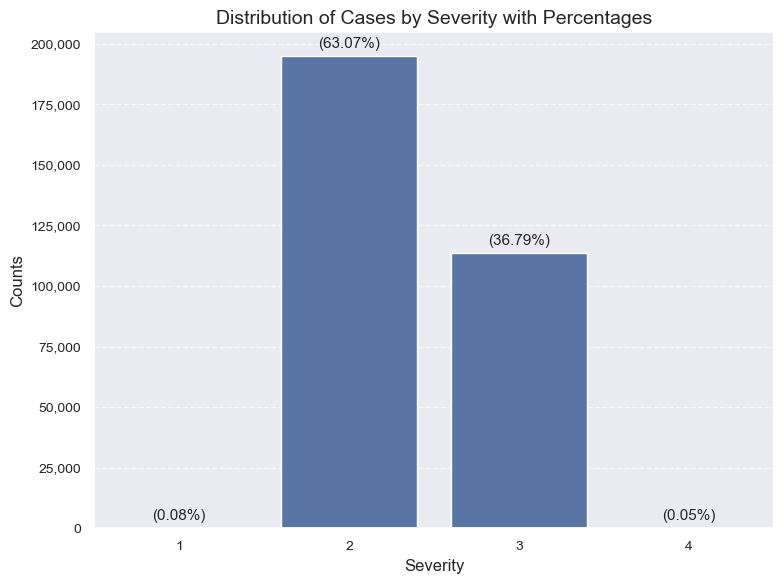

In [58]:
severity_counts = df['Severity'].value_counts().sort_index()
total_cases = df.shape[0]
severity_percentages = (severity_counts / total_cases) * 100

severity_df = pd.DataFrame({
    'Severity': severity_counts.index,
    'Counts': severity_counts.values,
    'Percentage': severity_percentages.values
})

plt.figure(figsize=(8, 6))
sns.barplot(data=severity_df, x = "Severity", y="Counts")
for i, row in severity_df.iterrows():
    plt.text(i, row['Counts'] + total_cases * 0.01,
             f"({row['Percentage']:.2f}%)", 
             ha='center', fontsize=11) 
    
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.title('Distribution of Cases by Severity with Percentages', fontsize=14)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Based on the above plot:
1. Severity 2 (almsot 80%) - most cases fall under this category means most cases are moderate in nature.
2. 17% cases fall under severity level 3 they are smaller percentage as comapred to severity 2 but still reflect a significant number of serious inciddents.
3. less than 1% cases fall under the severity -1 means very few cases are there that are very mild in nature.
4. 2.65% of the cases are very critical in nature which are rare but still require significant attention and more insights can be found with further analysis

The dataset maybe biased towards severity 2 but it is also possible that most cases fall under this category,and preventing such cases is possible with improving safety plans and infrastrcuture. Severity 1 maybe rare and may not be reported as often.

In [59]:
df.groupby(["City", "Severity"]).size()

City           Severity
Abbeville      2           34
Abbott         2            2
               3            4
Abbottstown    2            9
Aberdeen       2           19
                           ..
Zieglerville   2            9
Zion           2           22
               3            2
Zionsville     2            1
Zolfo Springs  2           10
Length: 6024, dtype: int64

In [60]:
grouped_data = df.groupby(["City", 'Severity']).size().reset_index(name='Counts')
grouped_data.groupby("City")['Counts'].transform("sum")

0       34
1        6
2        6
3        9
4       50
        ..
6019     9
6020    24
6021    24
6022     1
6023    10
Name: Counts, Length: 6024, dtype: int64

In [61]:
grouped_data.pivot(index="City", columns='Severity', values='Counts').fillna(0)

Severity,1,2,3,4
City,,,,
Abbeville,0.0,34.0,0.0,0.0
Abbott,0.0,2.0,4.0,0.0
Abbottstown,0.0,9.0,0.0,0.0
Aberdeen,0.0,19.0,31.0,0.0
Abingdon,0.0,6.0,22.0,0.0
...,...,...,...,...
Zephyrhills,0.0,79.0,0.0,0.0
Zieglerville,0.0,9.0,0.0,0.0
Zion,0.0,22.0,2.0,0.0


In [62]:
def plot_severity_distribution(data, group_by_column, figsize=(12, 8), top_n=None):
    
    # grouping the data by column
    grouped_data = data.groupby([group_by_column, 'Severity']).size().reset_index(name='Counts')
    
    # total number of cases for each group_by_column
    total_counts_per_group = grouped_data.groupby(group_by_column)['Counts'].transform('sum')
    
    # calculate percentage for each severity level
    grouped_data['Percentage'] = (grouped_data['Counts'] / total_counts_per_group) * 100
    
    # include only the top N groups based on total counts 
    if top_n:
        top_groups = grouped_data.groupby(group_by_column)['Counts'].sum().nlargest(top_n).index
        grouped_data = grouped_data[grouped_data[group_by_column].isin(top_groups)]

    # pivoting the data for plotting
    pivot_counts = grouped_data.pivot(index=group_by_column, columns='Severity', values='Counts').fillna(0)
    pivot_percentages = grouped_data.pivot(index=group_by_column, columns='Severity', values='Percentage').fillna(0)

    # sorting rows in descending order by the total number of cases
    pivot_counts['Total'] = pivot_counts.sum(axis=1)
    pivot_counts = pivot_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

    # plotting 
    ax = pivot_counts.plot(
        kind='bar', 
        stacked=True, 
        colormap='viridis', 
        figsize=figsize, 
        width=0.8
    )
    
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
    plt.title(f'Number of Cases by Severity and {group_by_column}', fontsize=16)
    plt.xlabel(group_by_column, fontsize=12)
    plt.ylabel('Number of Cases', fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.legend(title='Severity Level', fontsize=10)
    plt.tight_layout()
    plt.show() 

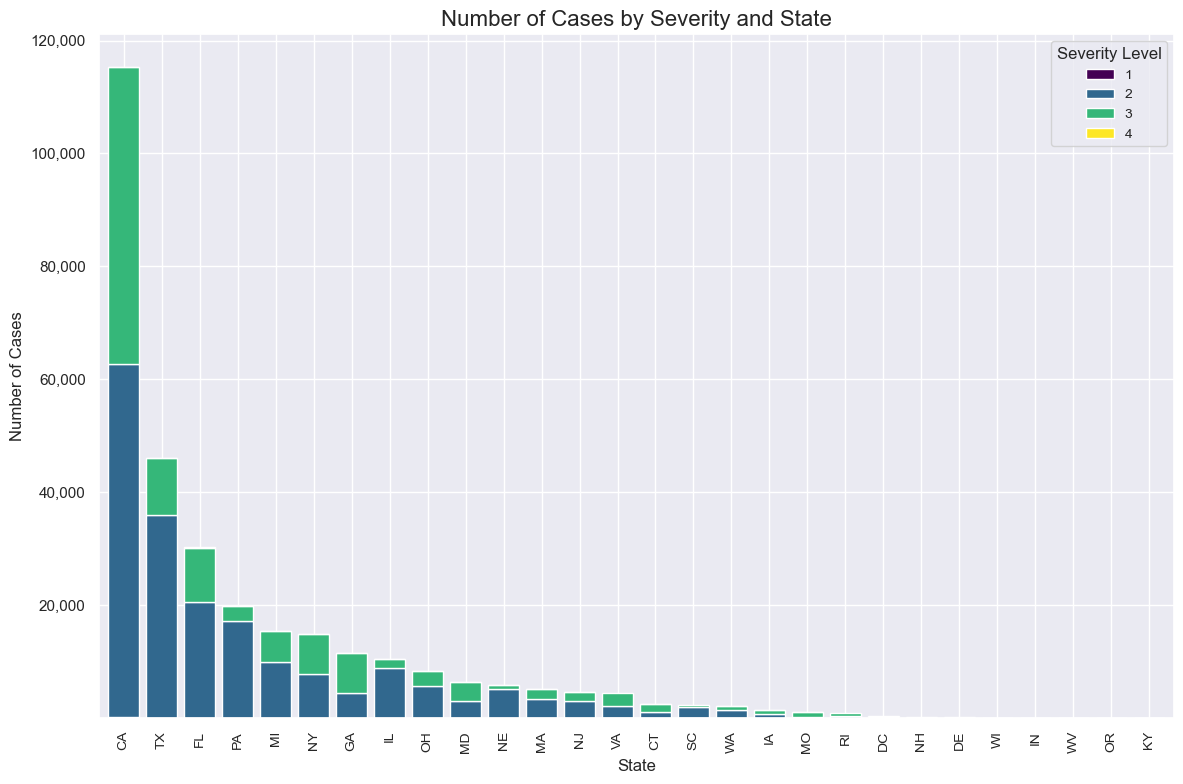

In [63]:
plot_severity_distribution(df, group_by_column='State', top_n=30);

Majority of the cases are happening in CA, FL,TX 

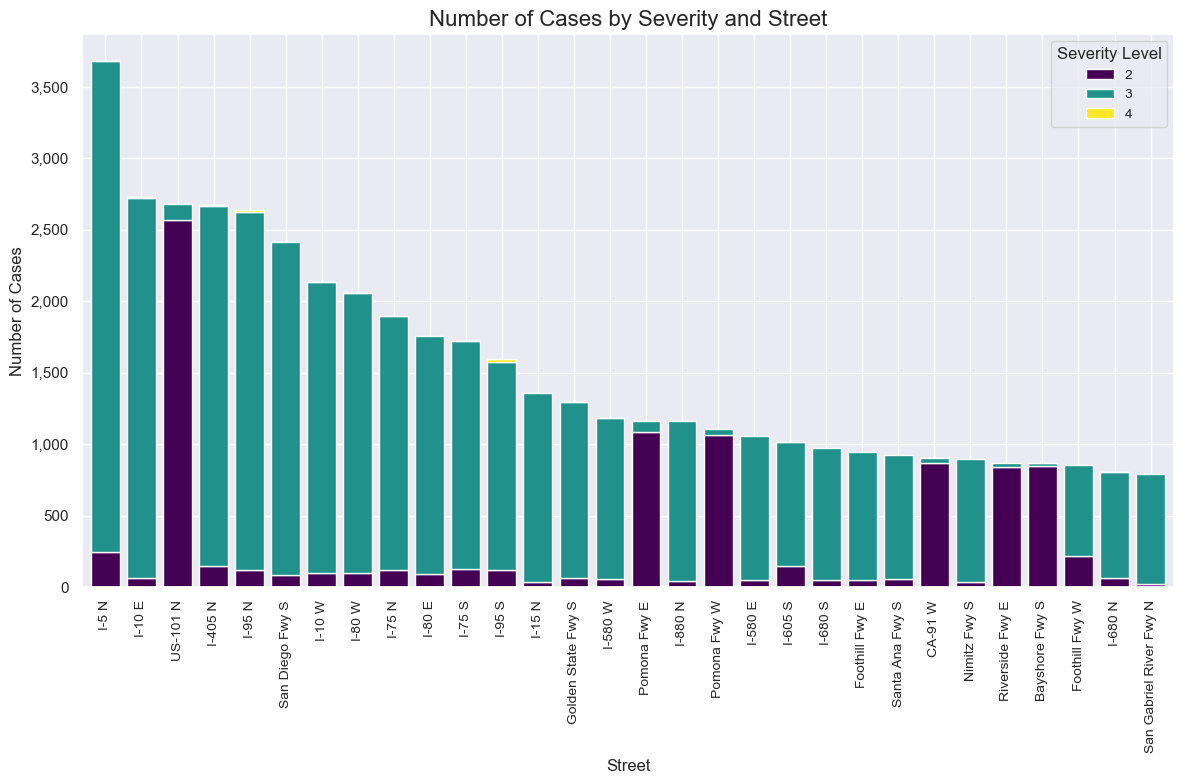

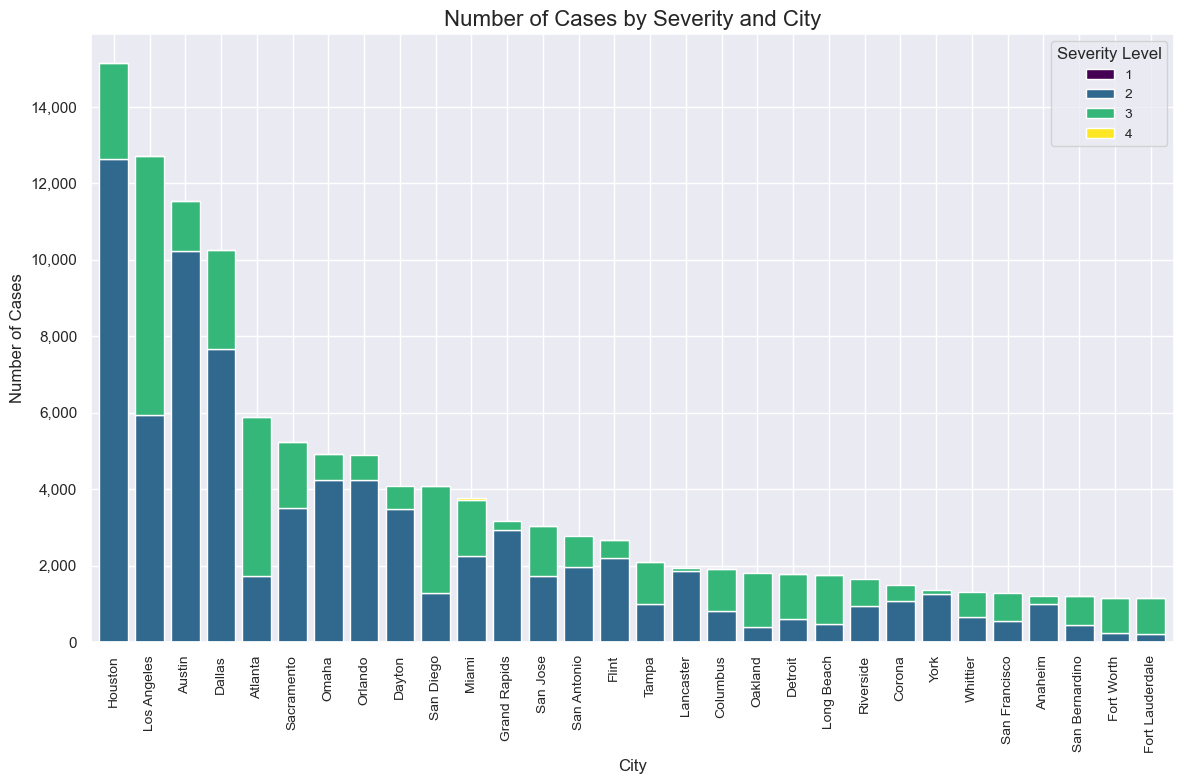

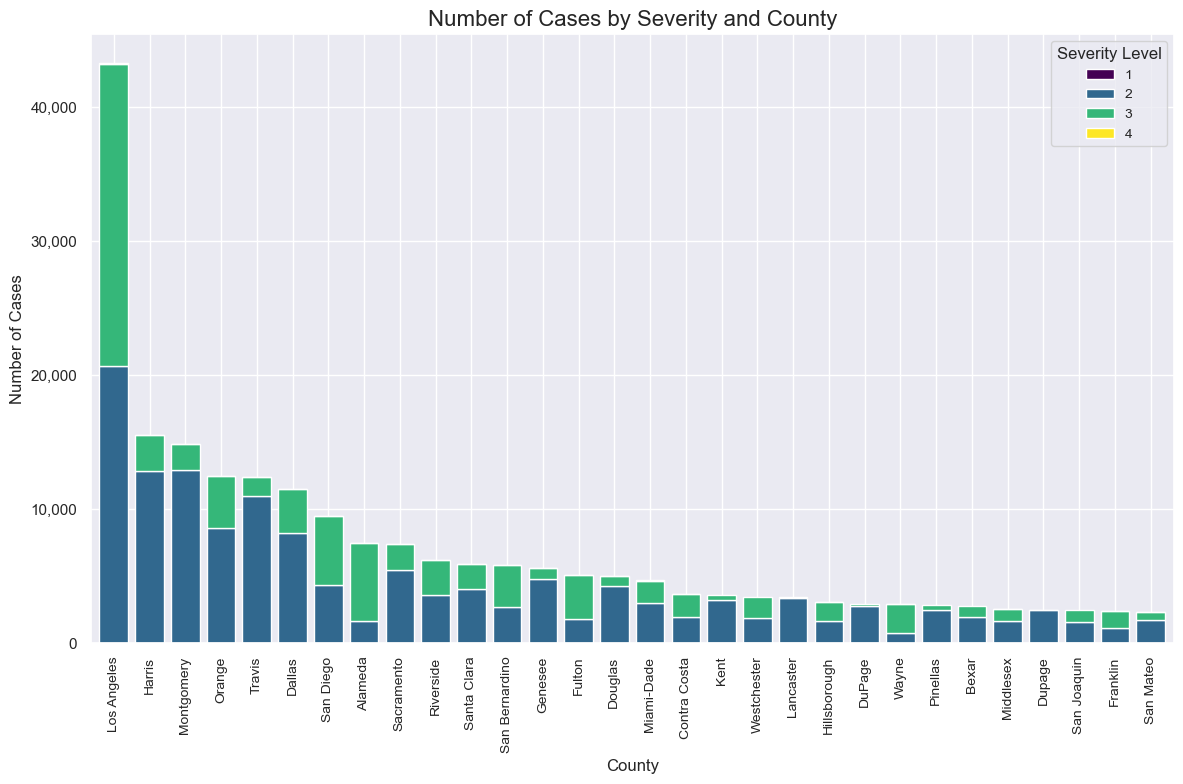

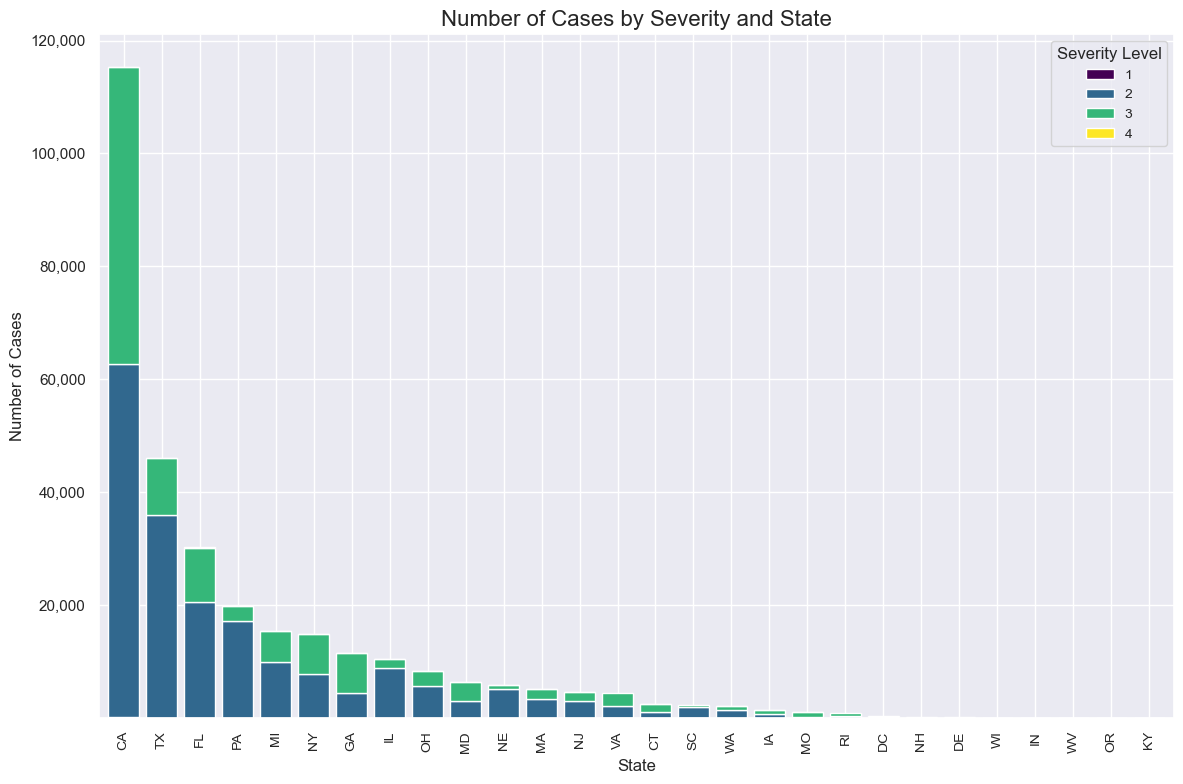

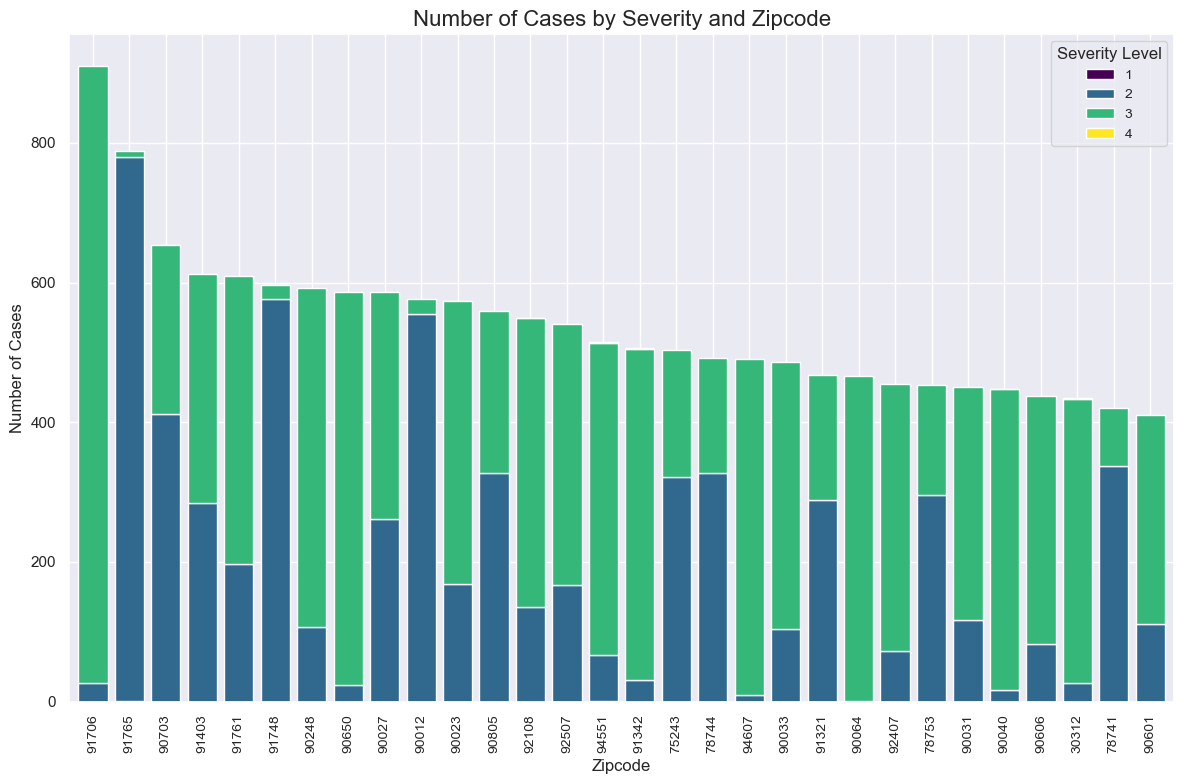

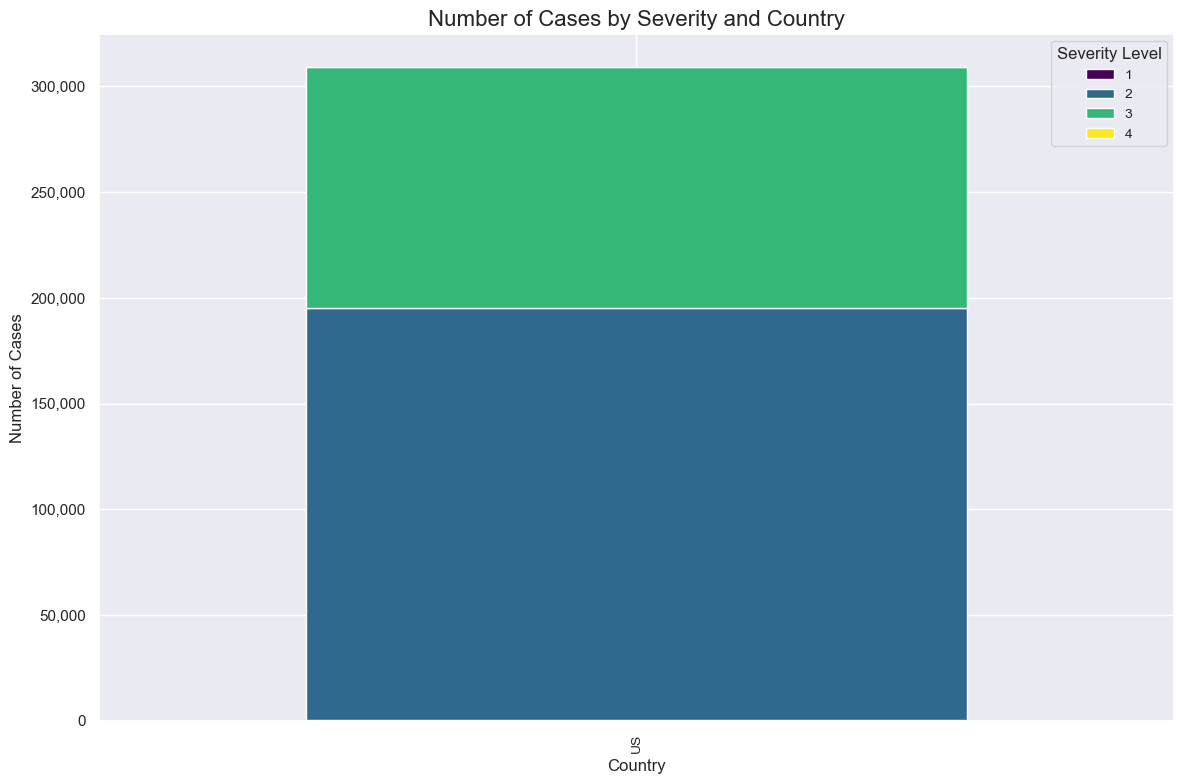

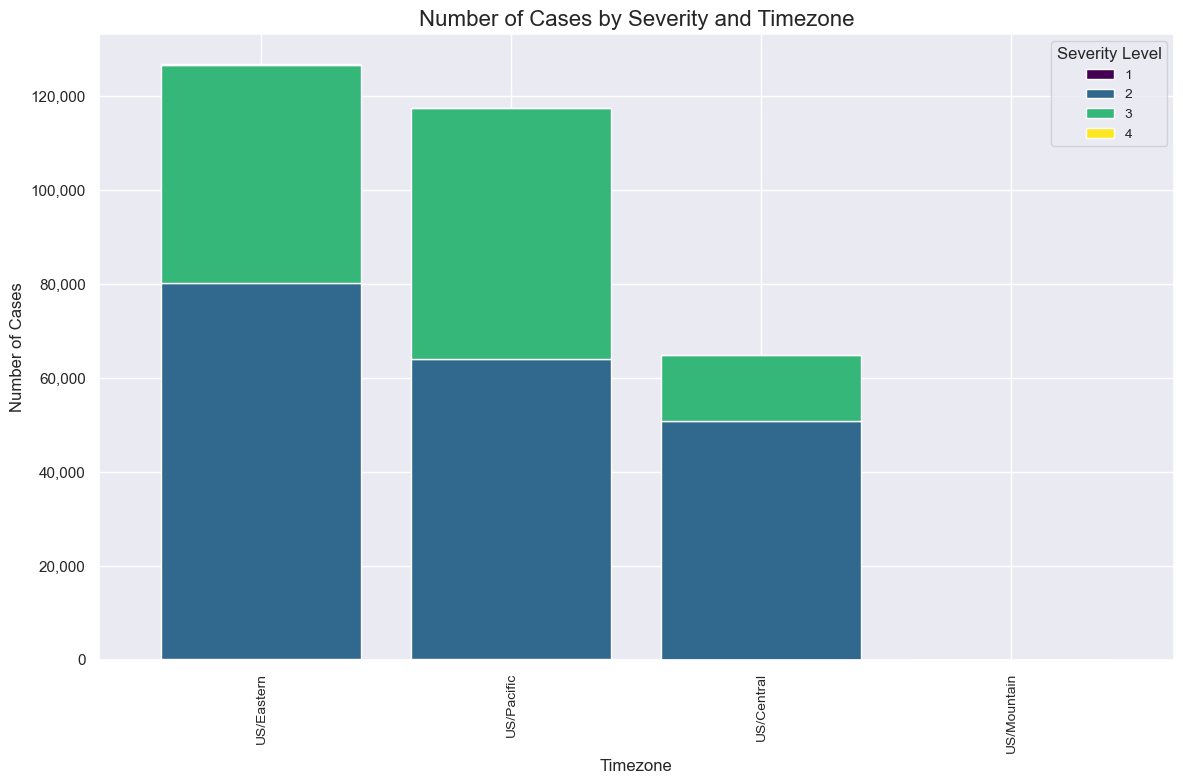

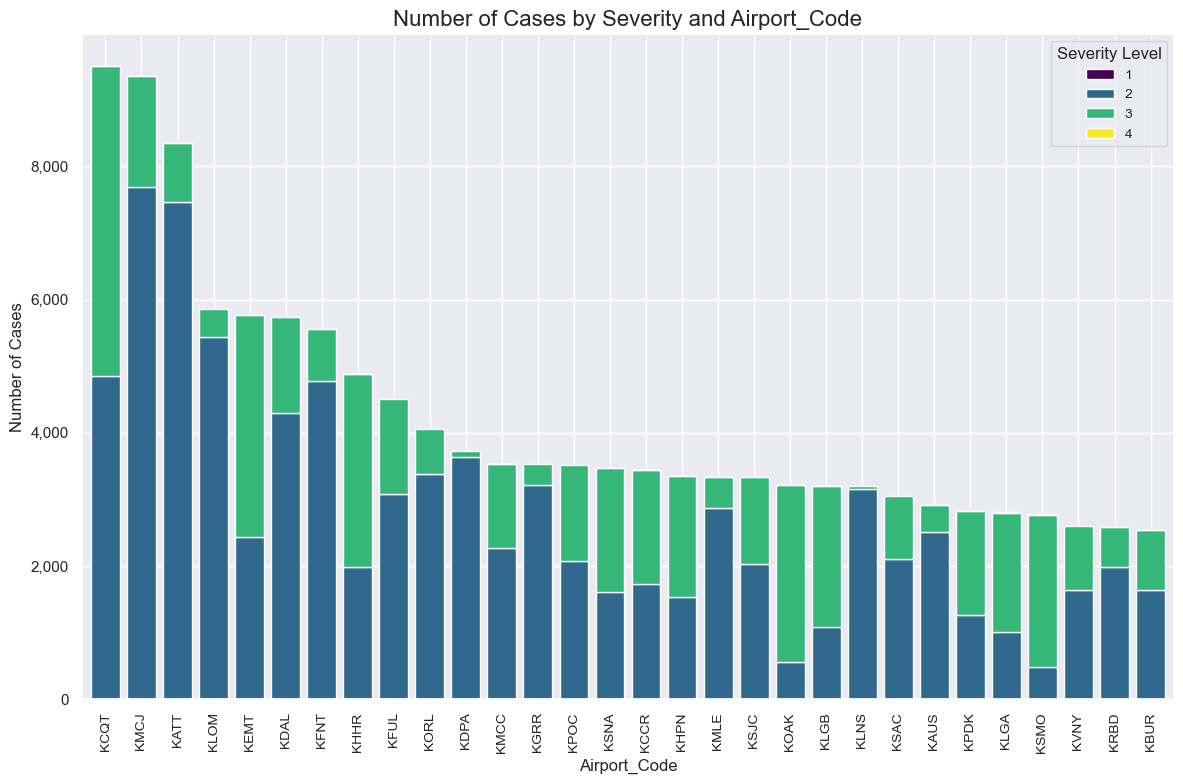

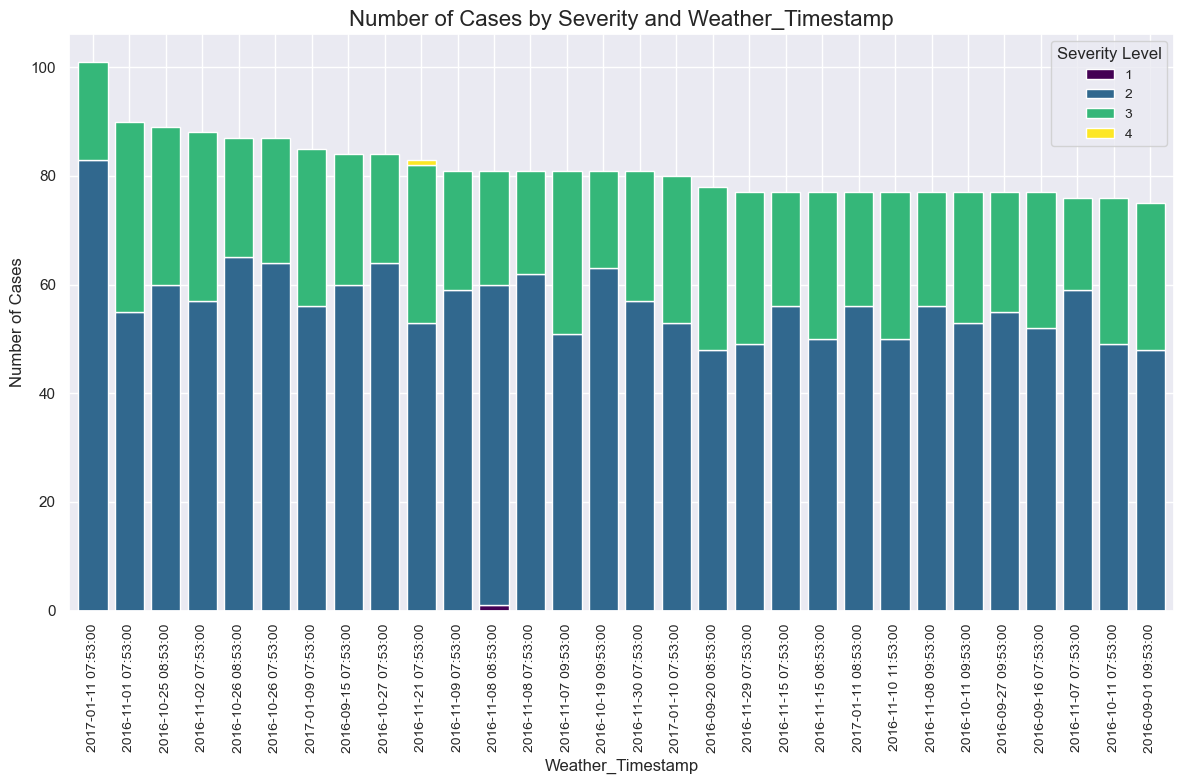

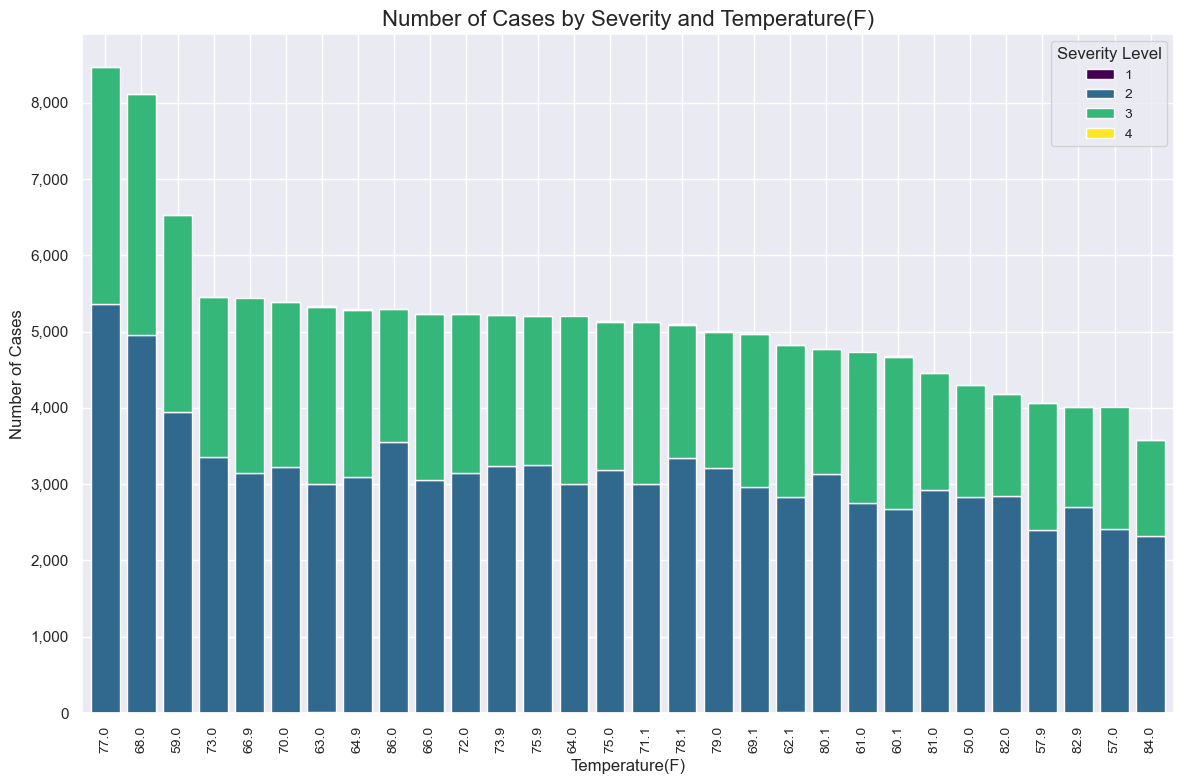

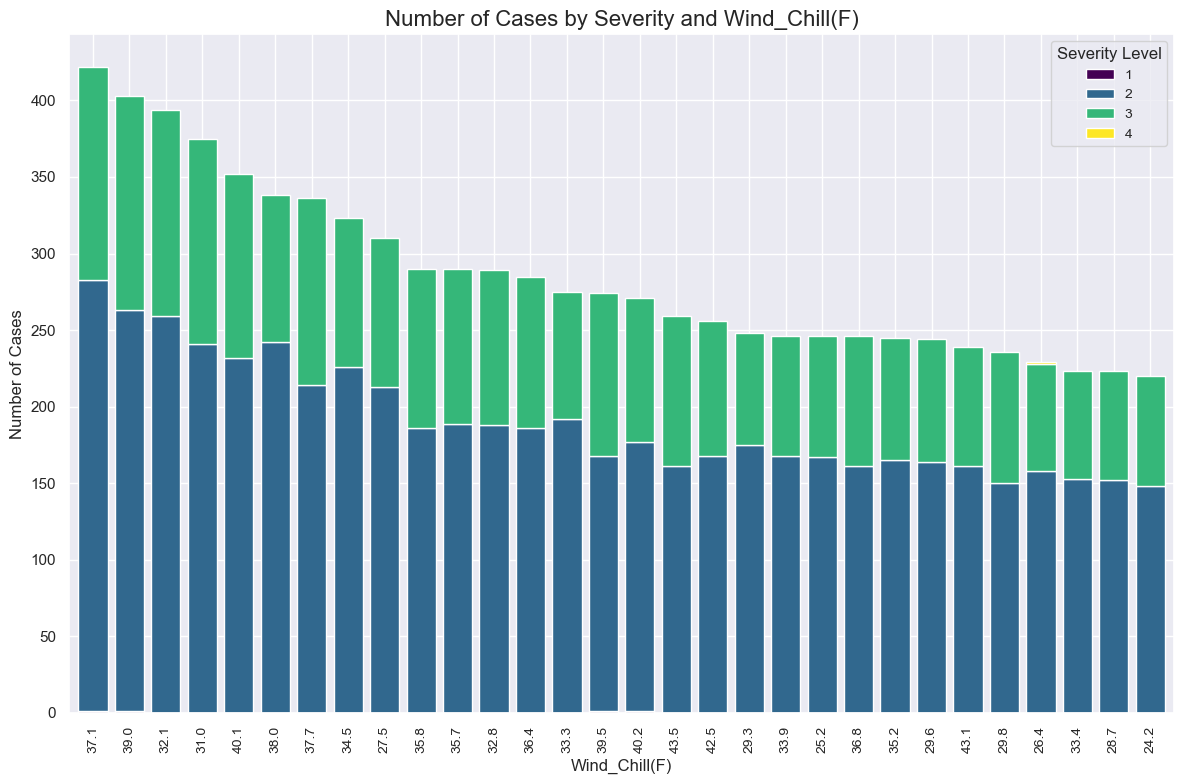

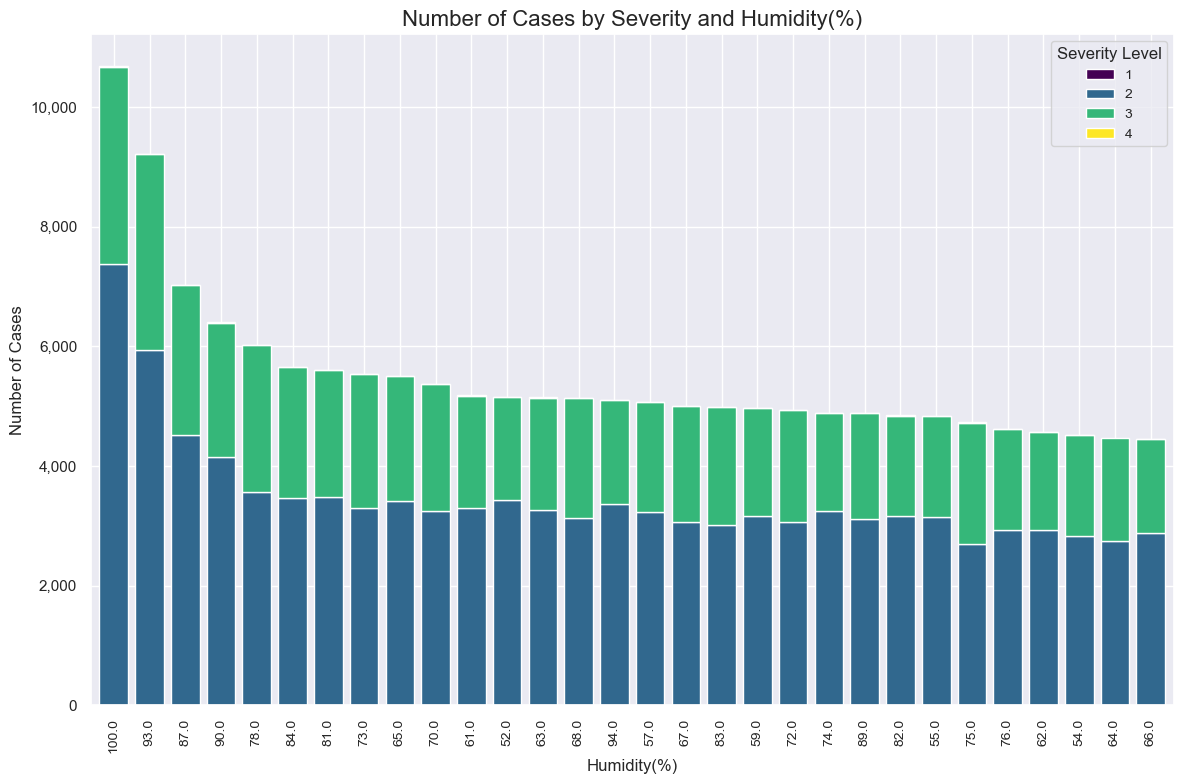

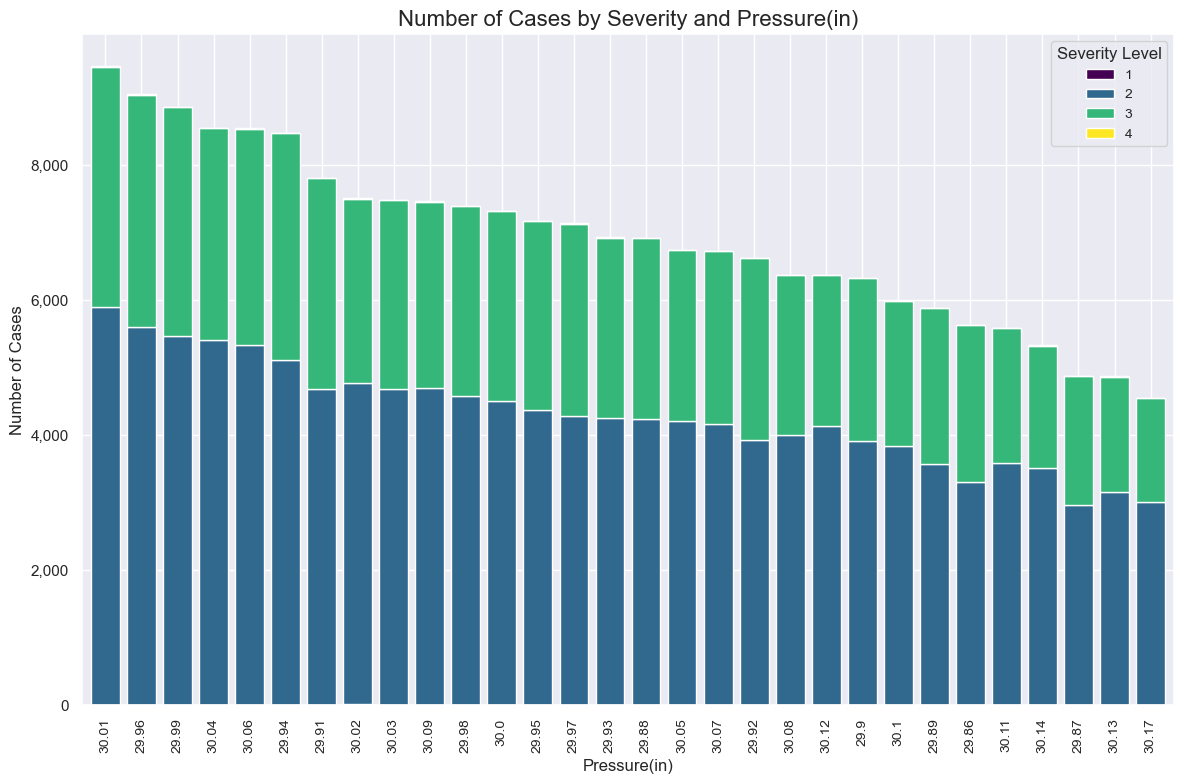

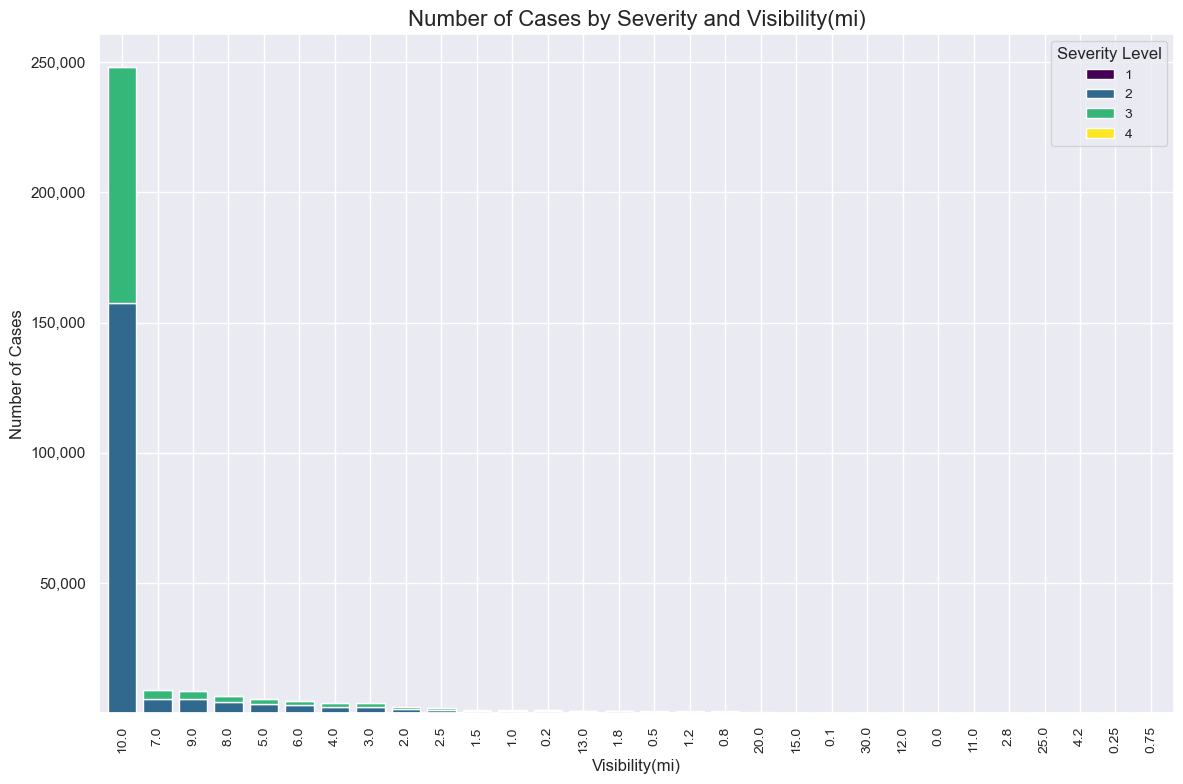

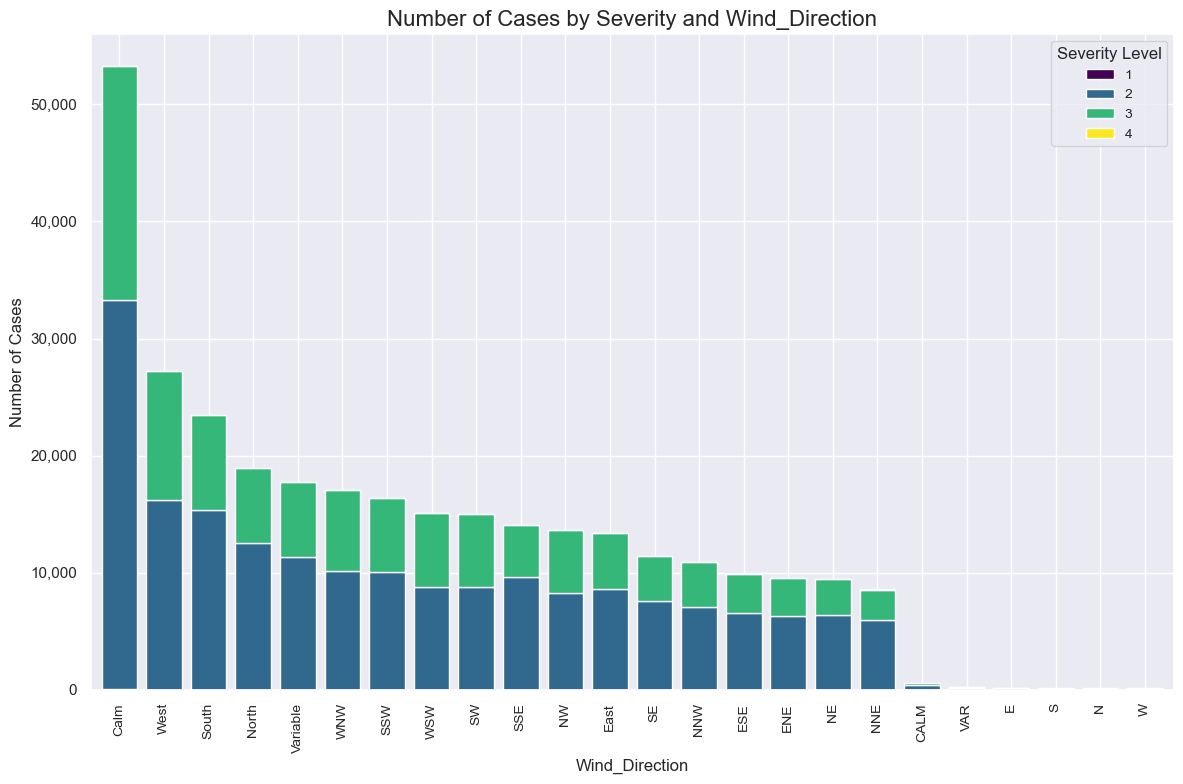

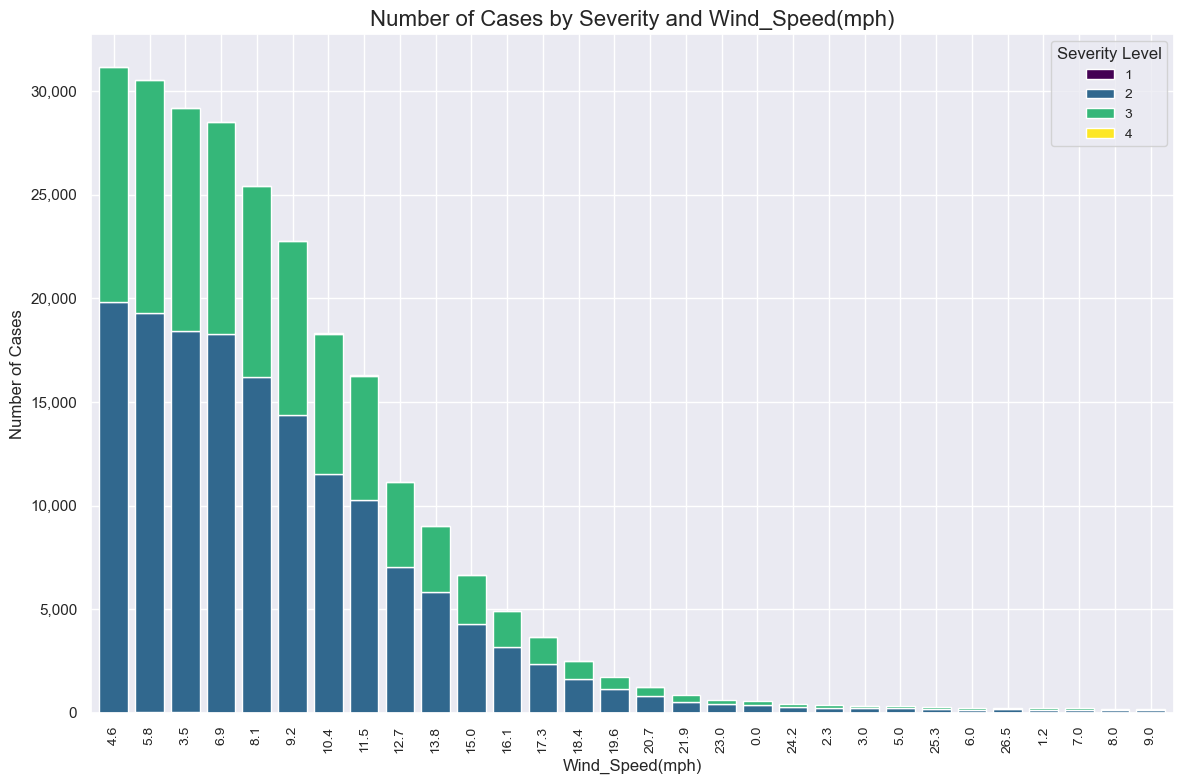

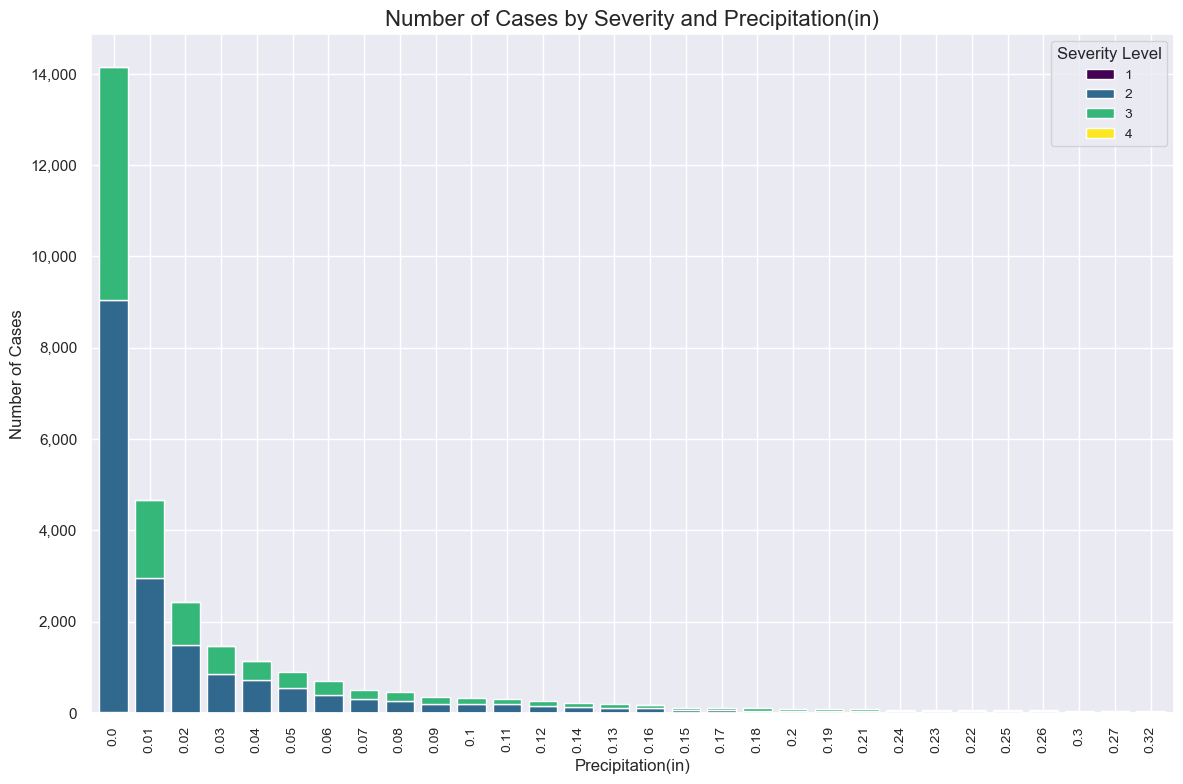

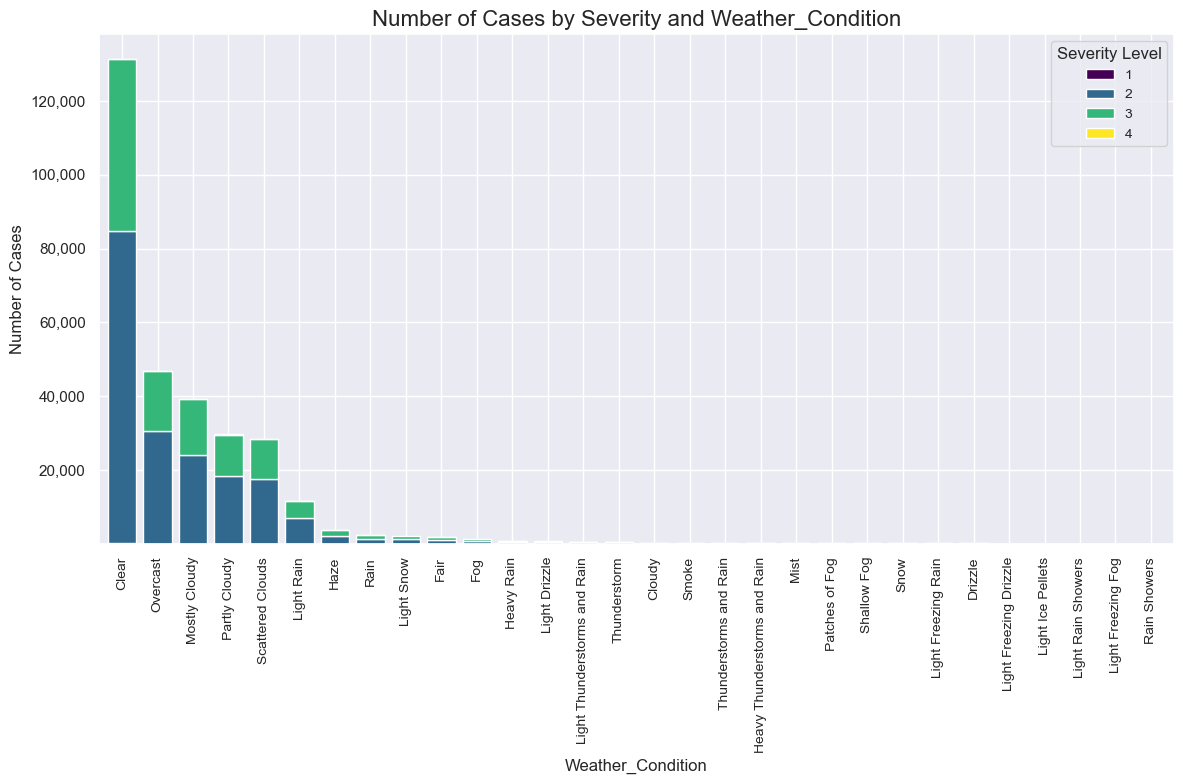

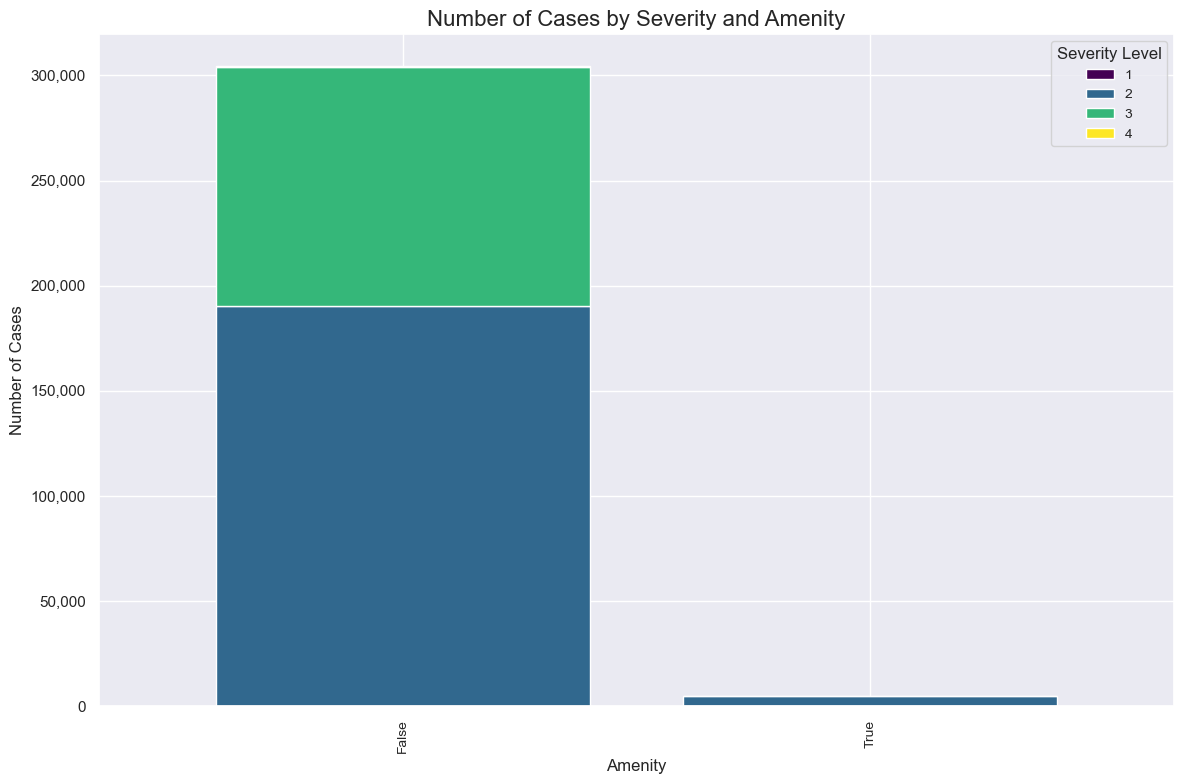

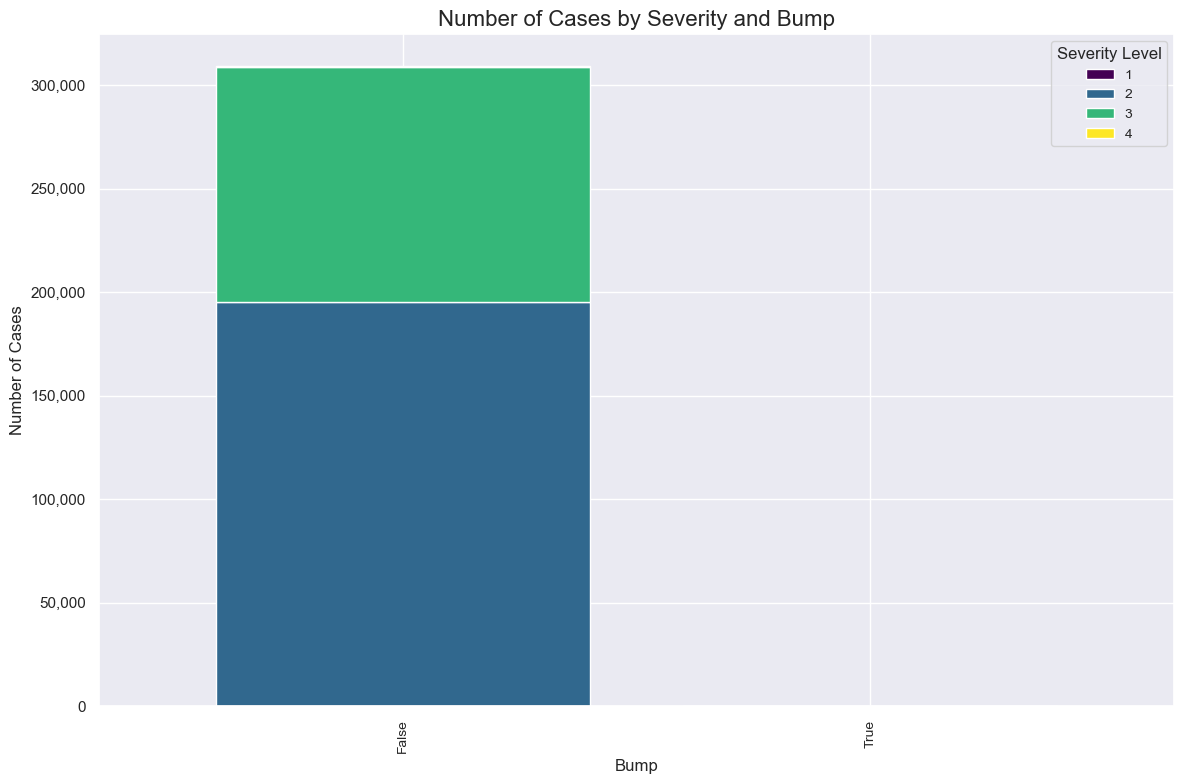

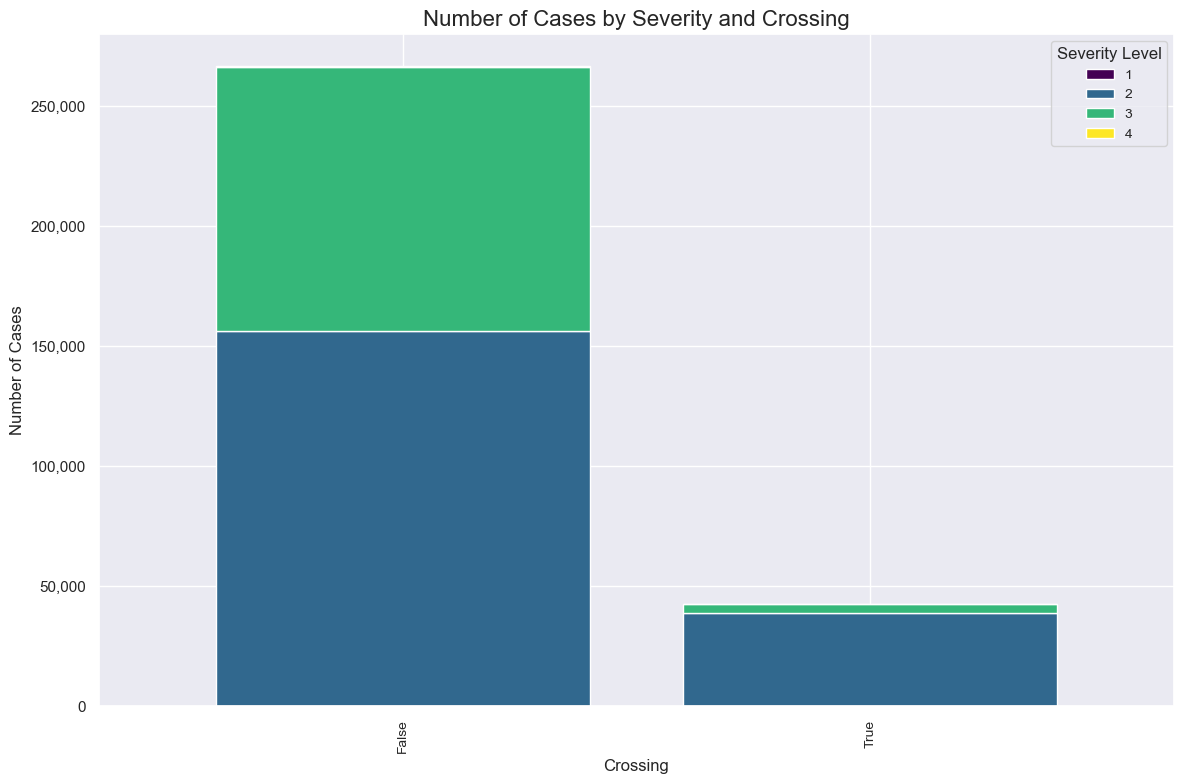

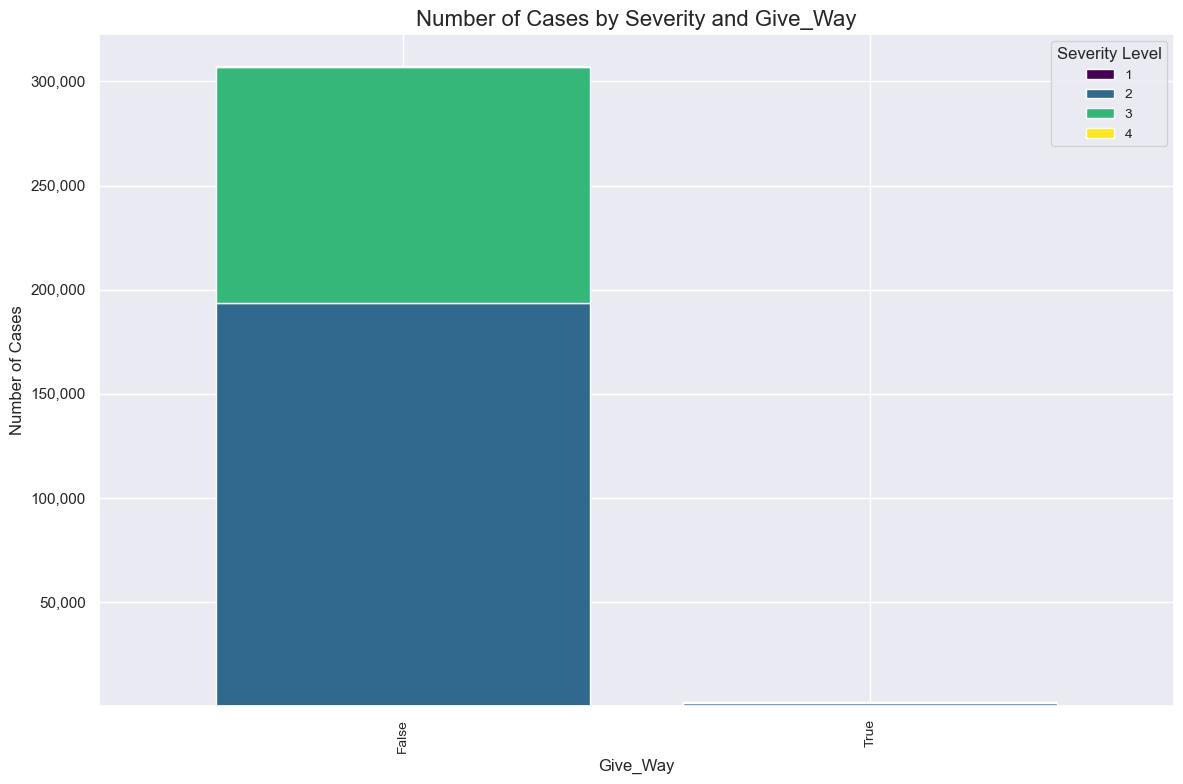

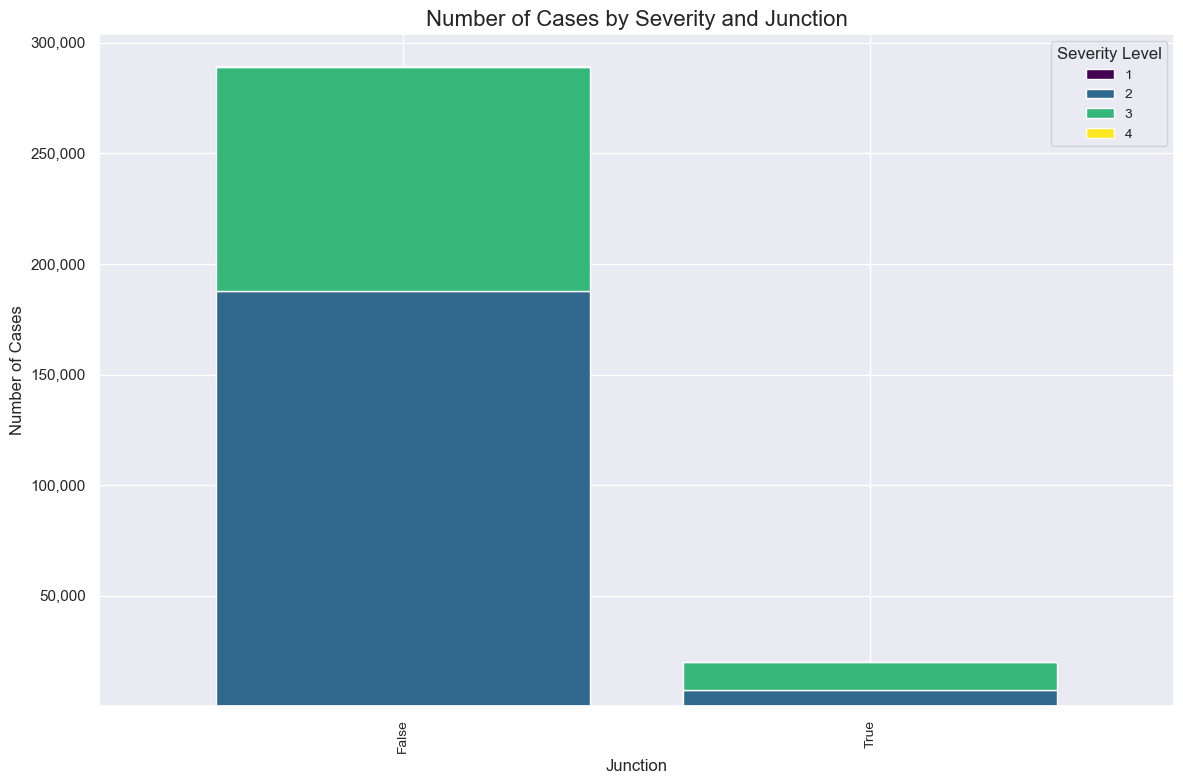

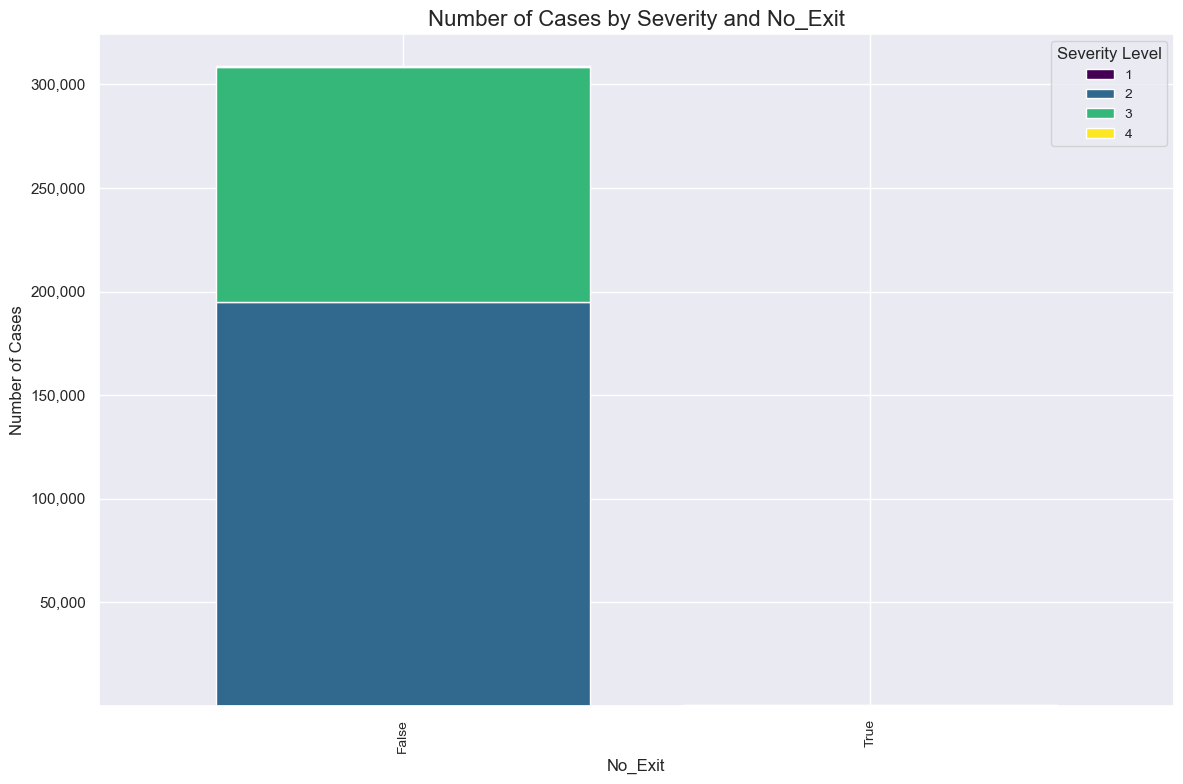

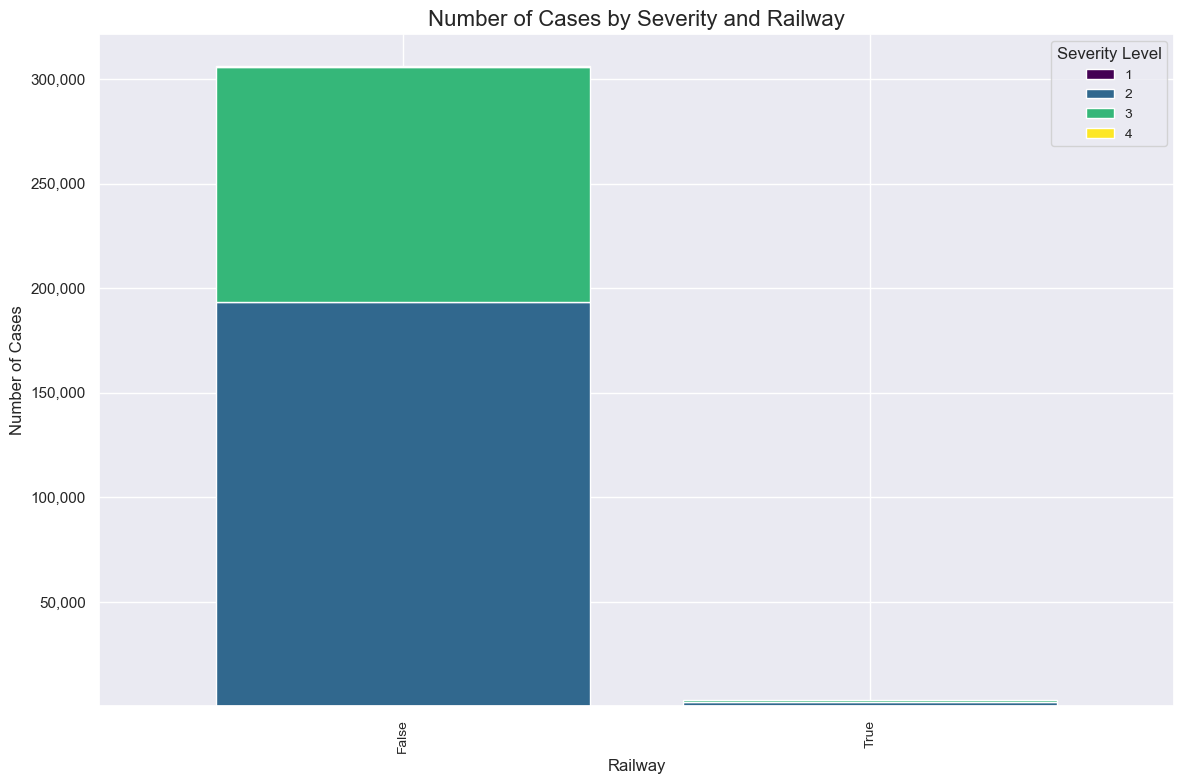

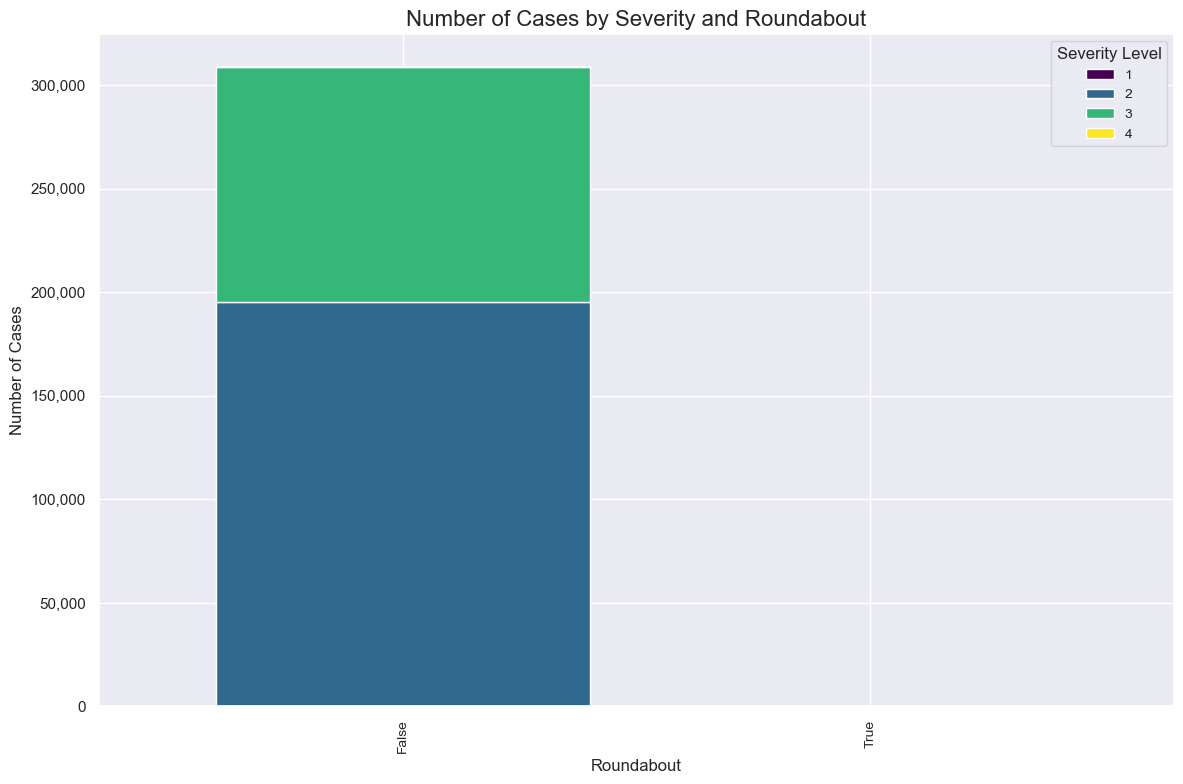

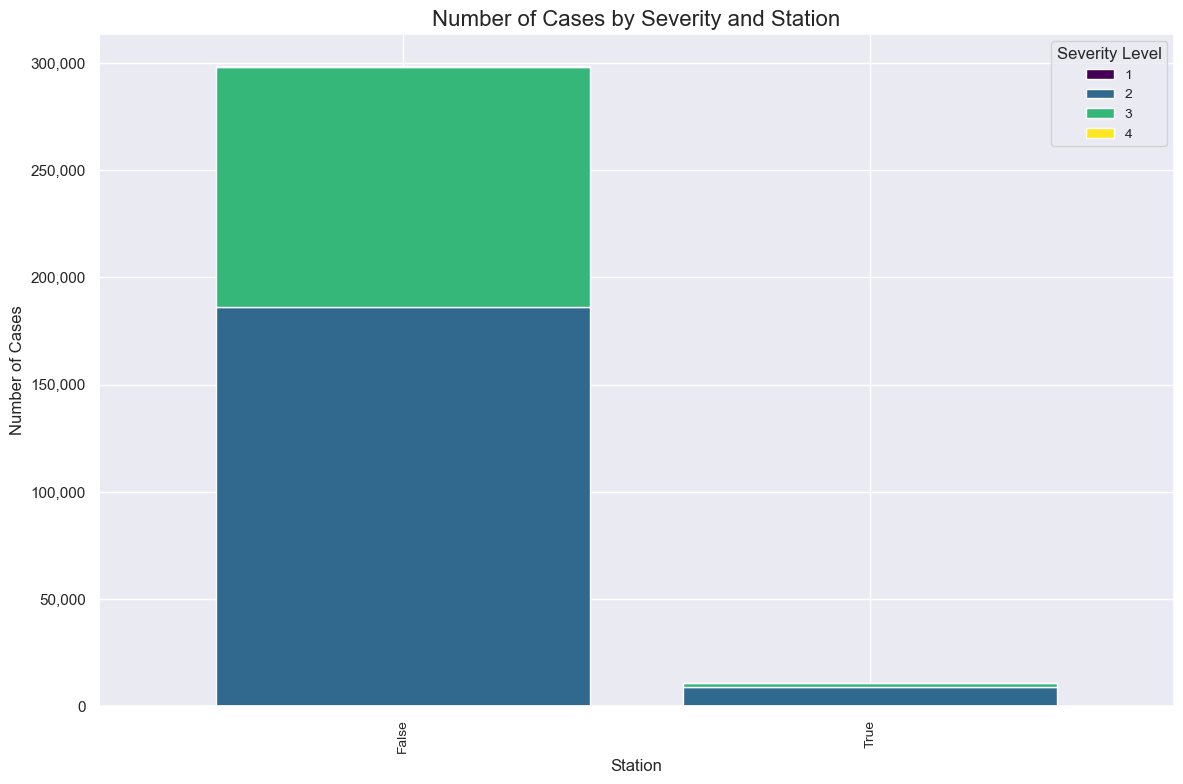

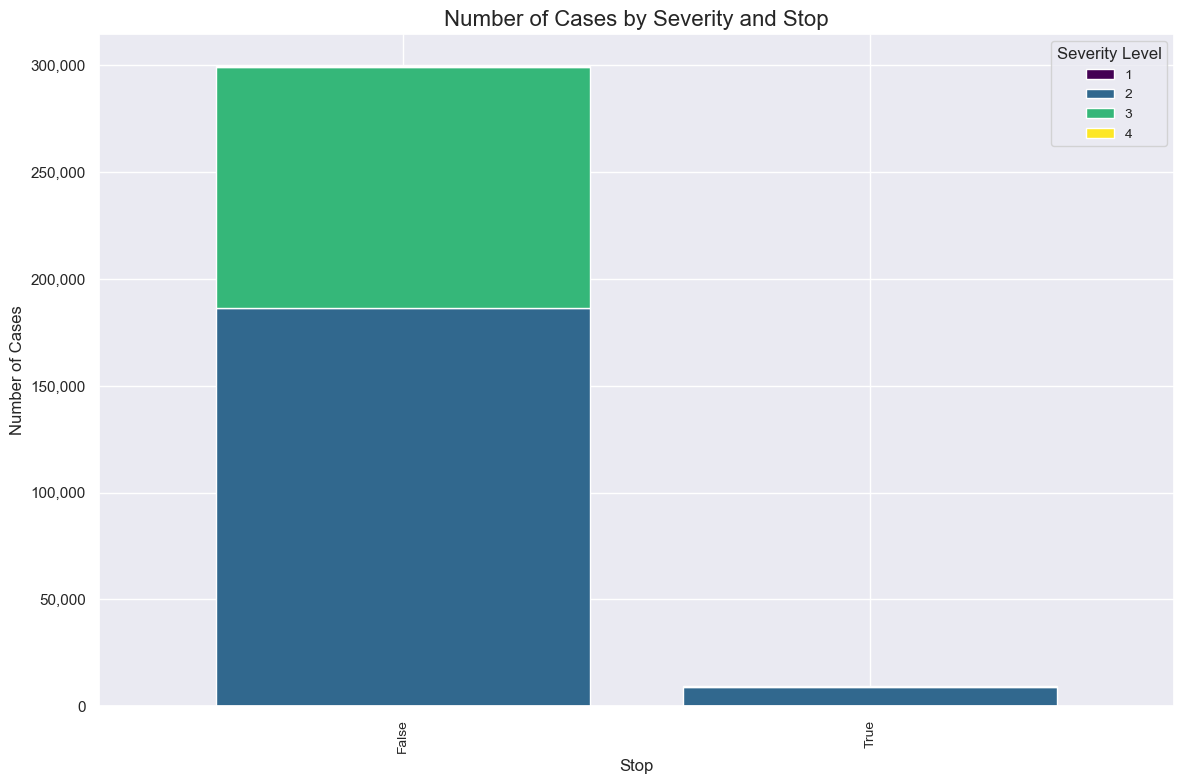

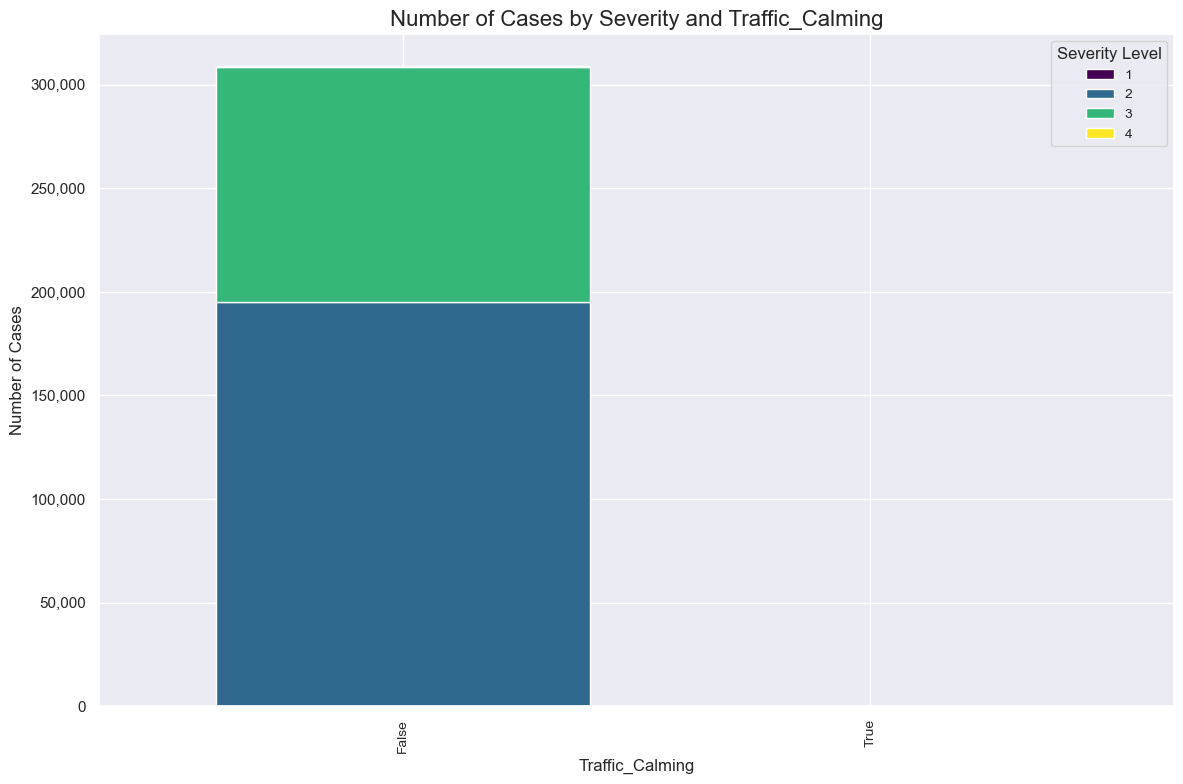

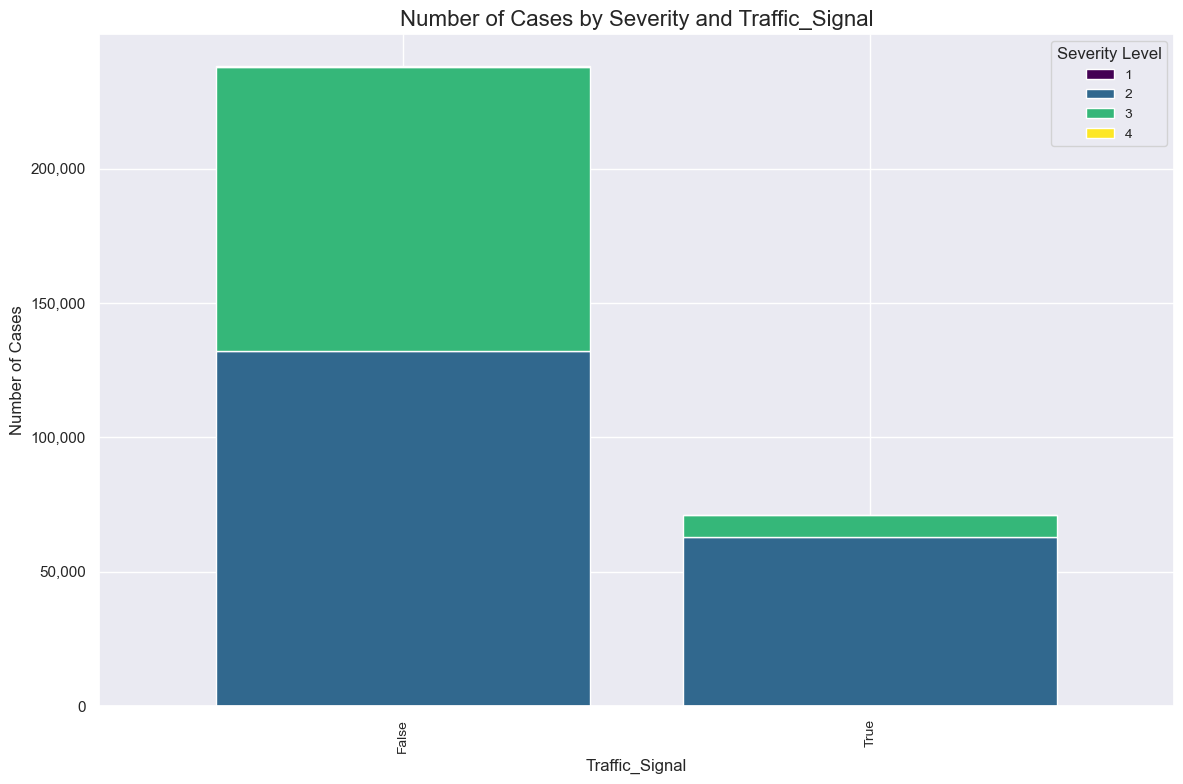

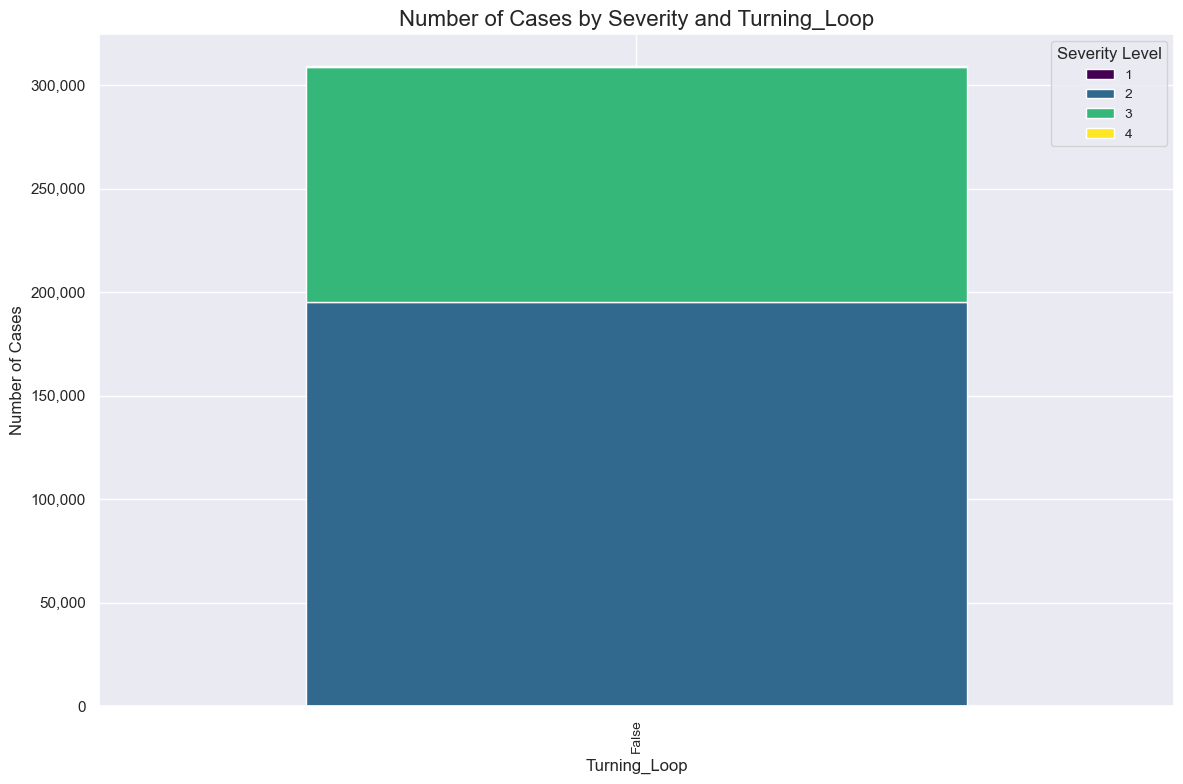

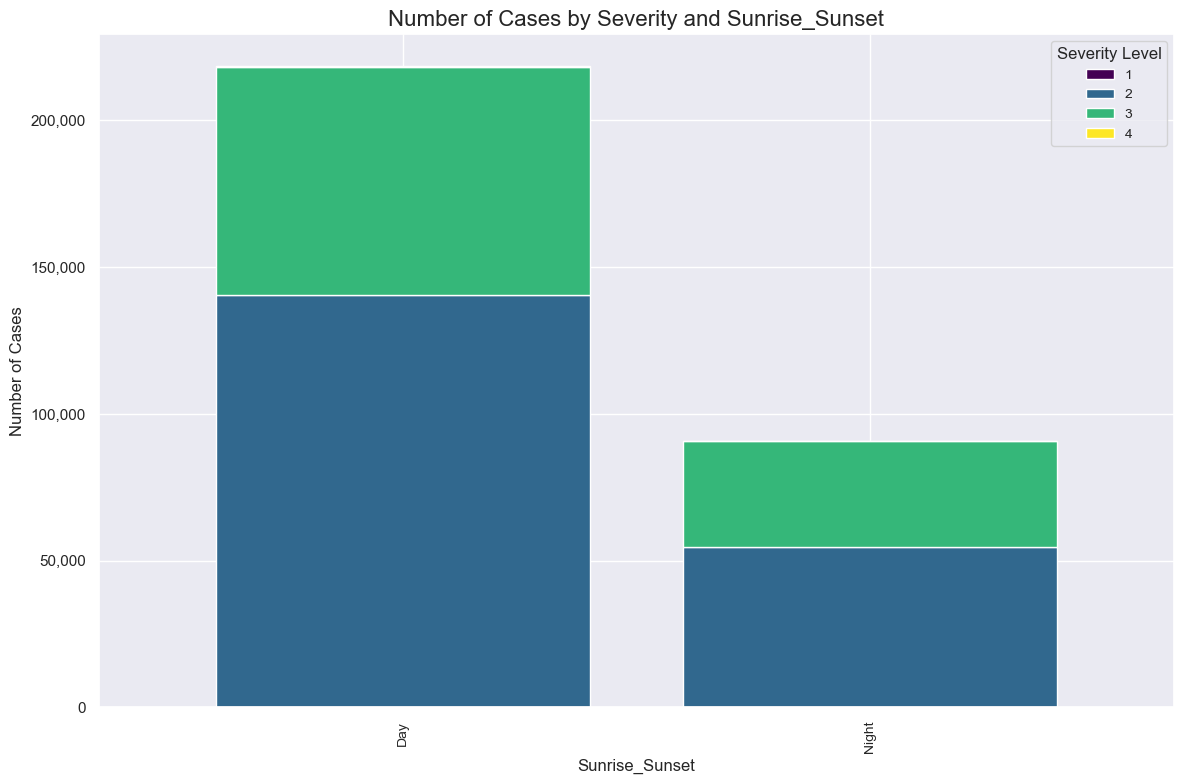

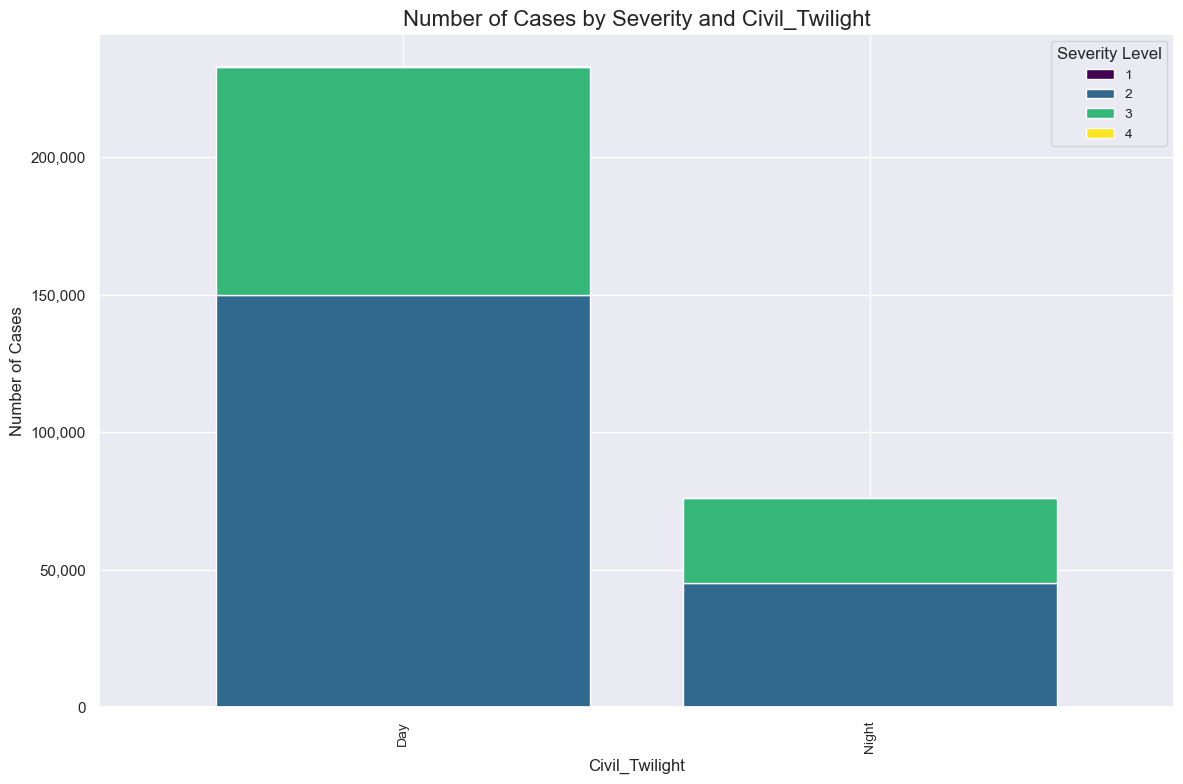

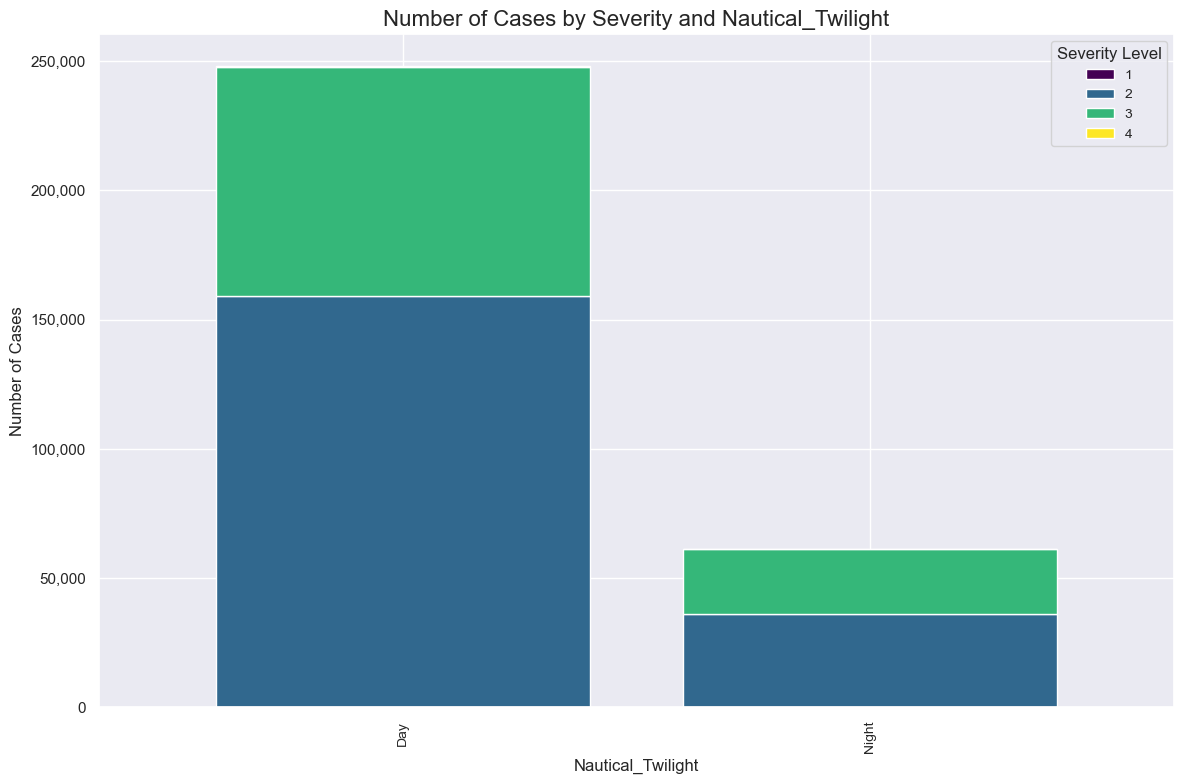

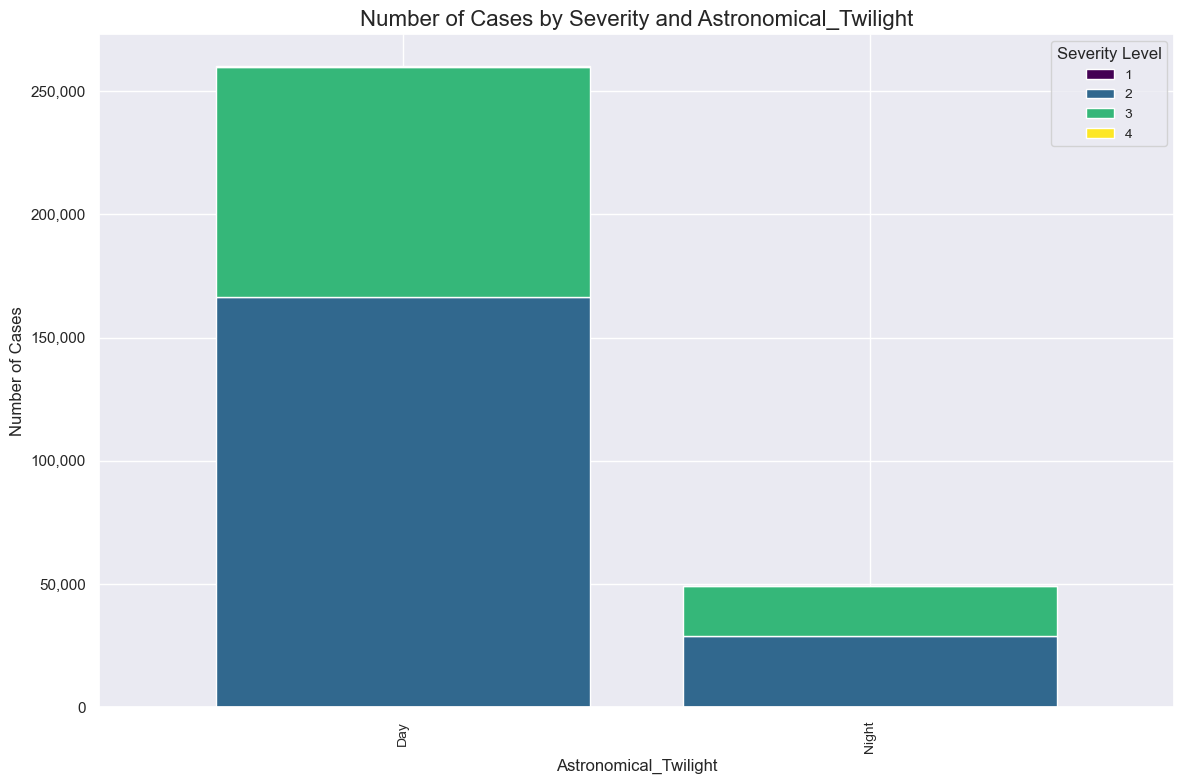

In [64]:
columns_to_plot = ['Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'] 

for column in columns_to_plot: plot_severity_distribution(df, group_by_column=column, top_n=30);

Plotting with 309090 non-null observations for the selected columns.


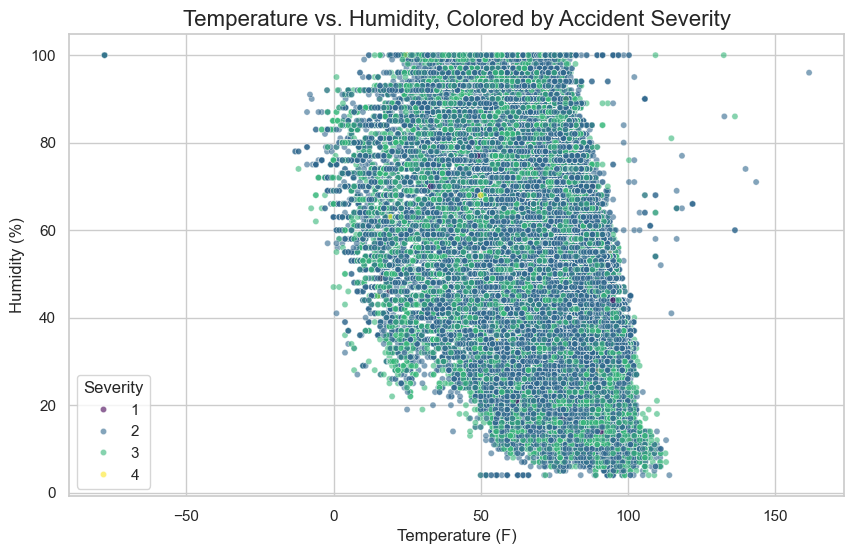

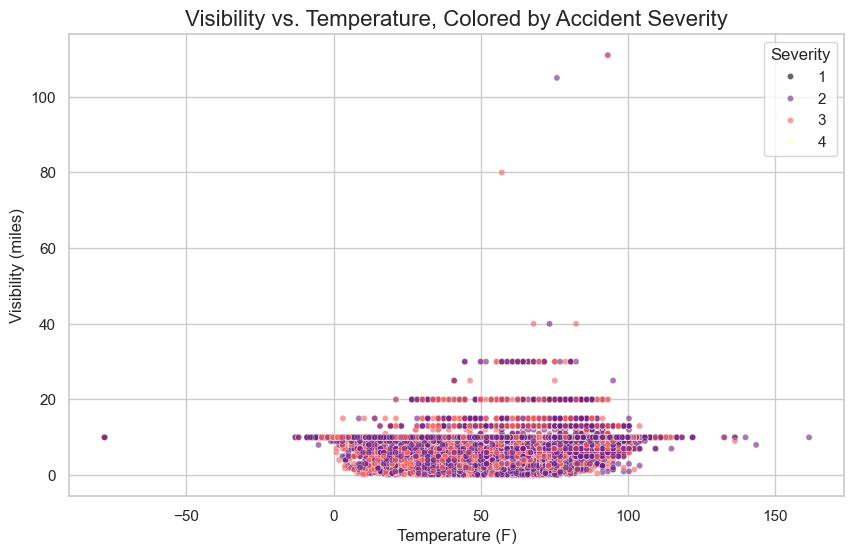

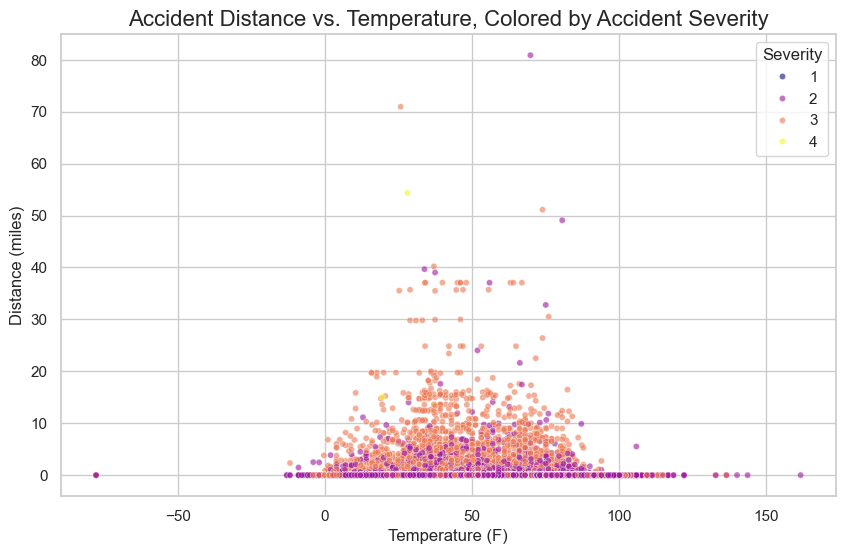

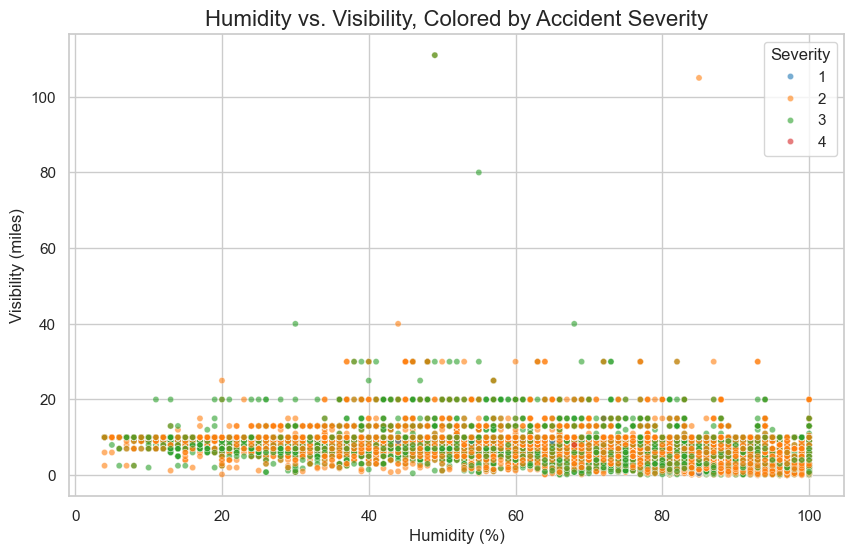

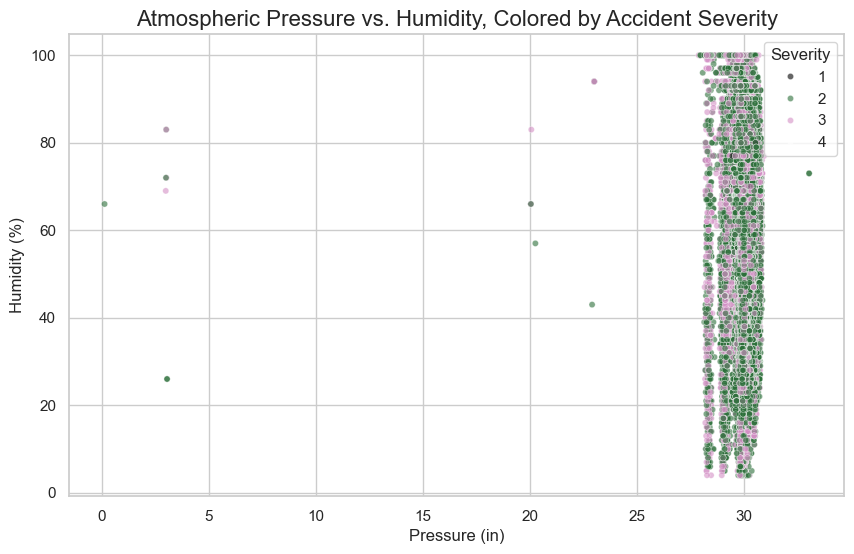

In [101]:

# Set a style for better visualization
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 

# Define the columns to use and drop any NaN values from them for plotting stability
# We include 'Severity' to use it as a color hue (a 3rd dimension of insight)
plot_cols = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Distance(mi)', 'Pressure(in)', 'Severity']
df_plot = df[plot_cols].dropna()

print(f"Plotting with {len(df_plot)} non-null observations for the selected columns.")

# --- 1. Scatter Plot: Temperature(F) vs. Humidity(%) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Temperature(F)', 
    y='Humidity(%)', 
    hue='Severity', 
    data=df_plot, 
    palette='viridis', 
    alpha=0.6,
    s=20 # size of points
)
plt.title('Temperature vs. Humidity, Colored by Accident Severity', fontsize=16)
plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.show()

# --- 2. Scatter Plot: Visibility(mi) vs. Temperature(F) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Temperature(F)', 
    y='Visibility(mi)', 
    hue='Severity', 
    data=df_plot, 
    palette='magma', 
    alpha=0.6,
    s=20
)
plt.title('Visibility vs. Temperature, Colored by Accident Severity', fontsize=16)
plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Visibility (miles)', fontsize=12)
plt.show()

# --- 3. Scatter Plot: Distance(mi) vs. Temperature(F) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Temperature(F)', 
    y='Distance(mi)', 
    hue='Severity', 
    data=df_plot, 
    palette='plasma', 
    alpha=0.6,
    s=20
)
plt.title('Accident Distance vs. Temperature, Colored by Accident Severity', fontsize=16)
plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Distance (miles)', fontsize=12)
plt.show()

# --- 4. Scatter Plot: Humidity(%) vs. Visibility(mi) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Humidity(%)', 
    y='Visibility(mi)', 
    hue='Severity', 
    data=df_plot, 
    palette='tab10', 
    alpha=0.6,
    s=20
)
plt.title('Humidity vs. Visibility, Colored by Accident Severity', fontsize=16)
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Visibility (miles)', fontsize=12)
plt.show()

# --- 5. Scatter Plot: Pressure(in) vs. Humidity(%) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Pressure(in)', 
    y='Humidity(%)', 
    hue='Severity', 
    data=df_plot, 
    palette='cubehelix', 
    alpha=0.6,
    s=20
)
plt.title('Atmospheric Pressure vs. Humidity, Colored by Accident Severity', fontsize=16)
plt.xlabel('Pressure (in)', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.show()

### The plots of the data shows that many accidents happened in areas where important road features like bumps, crossings, give-ways, junctions, exits, traffic calming, and traffic signals were missing. This could be a major reason for the high number of incidents, especially in cities like Los Angeles and states like California and Texas, which report a lot of accidents. The lack of these safety features, such as traffic signals and traffic calming, might be making the roads more dangerous. To reduce accidents, it’s important for authorities to improve road infrastructure by adding these missing elements. This could help lower the number of accidents and make the roads safer for everyone.

In [66]:
df['Start_Time'] = df['Start_Time'].str.replace(r'\.\d+$', '', regex=True) # removes the fractional seconds (.000000000)
df['End_Time'] = df['End_Time'].str.replace(r'\.\d+$', '', regex=True) 

df['Start_Time'] = pd.to_datetime(df['Start_Time']) 
df['End_Time'] = pd.to_datetime(df['End_Time'])

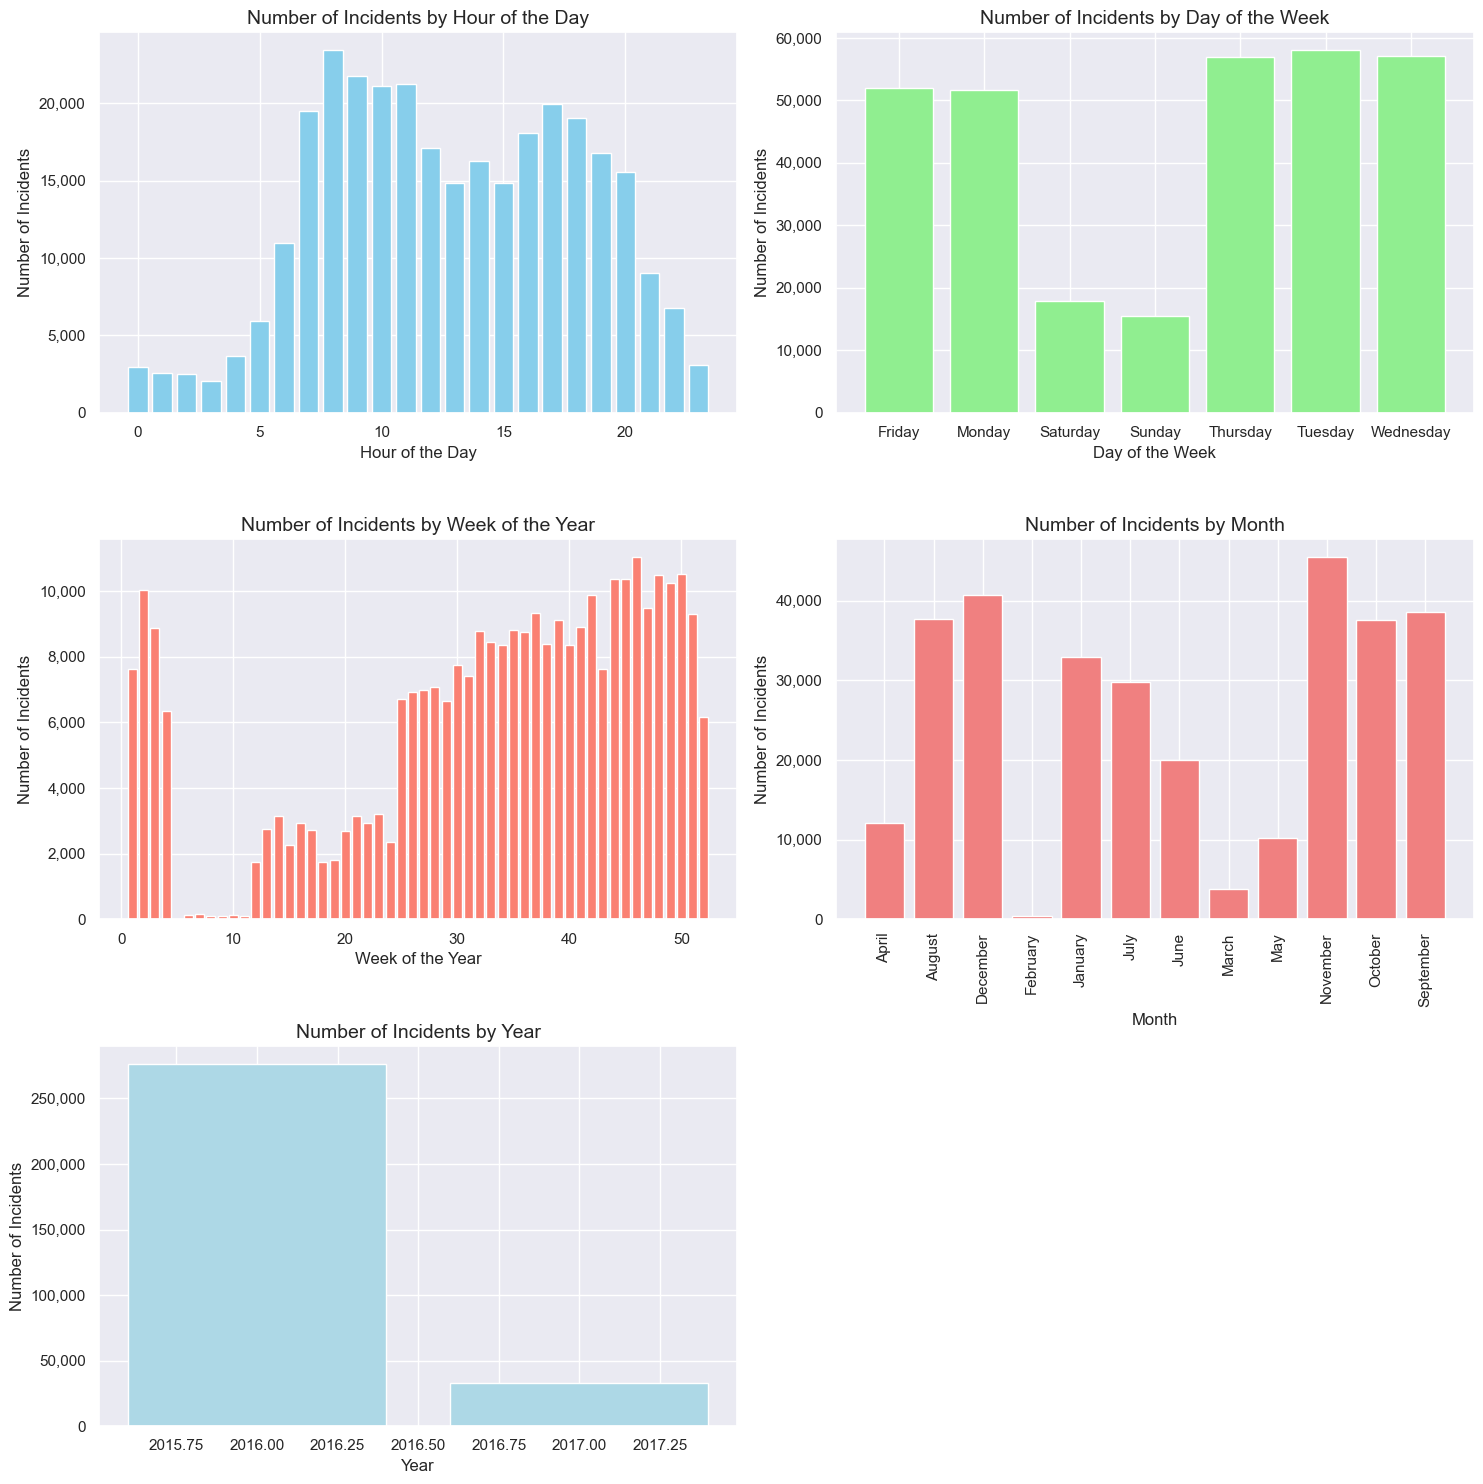

In [67]:
import matplotlib.ticker as ticker

incident_counts_by_time = df['Start_Time'].dt.hour.value_counts().sort_index()
incident_counts_by_day = df['Start_Time'].dt.day_name().value_counts().sort_index()
incident_counts_by_week = df['Start_Time'].dt.isocalendar().week.value_counts().sort_index()
incident_counts_by_month = df['Start_Time'].dt.month_name().value_counts().sort_index()
incident_counts_by_year = df['Start_Time'].dt.year.value_counts().sort_index()

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].bar(incident_counts_by_time.index, incident_counts_by_time.values, color='skyblue')
axs[0, 0].set_title('Number of Incidents by Hour of the Day', fontsize=14)
axs[0, 0].set_xlabel('Hour of the Day', fontsize=12)
axs[0, 0].set_ylabel('Number of Incidents', fontsize=12)

axs[0, 1].bar(incident_counts_by_day.index, incident_counts_by_day.values, color='lightgreen')
axs[0, 1].set_title('Number of Incidents by Day of the Week', fontsize=14)
axs[0, 1].set_xlabel('Day of the Week', fontsize=12)
axs[0, 1].set_ylabel('Number of Incidents', fontsize=12)

axs[1, 0].bar(incident_counts_by_week.index.astype(int), incident_counts_by_week.values, color='salmon')
axs[1, 0].set_title('Number of Incidents by Week of the Year', fontsize=14)
axs[1, 0].set_xlabel('Week of the Year', fontsize=12)
axs[1, 0].set_ylabel('Number of Incidents', fontsize=12)

axs[1, 1].bar(incident_counts_by_month.index, incident_counts_by_month.values, color='lightcoral')
axs[1, 1].set_title('Number of Incidents by Month', fontsize=14)
axs[1, 1].set_xlabel('Month', fontsize=12) 
axs[1, 1].set_ylabel('Number of Incidents', fontsize=12)
axs[1, 1].tick_params(axis='x', labelrotation=90)

axs[2, 0].bar(incident_counts_by_year.index, incident_counts_by_year.values, color='lightblue')
axs[2, 0].set_title('Number of Incidents by Year', fontsize=14)
axs[2, 0].set_xlabel('Year', fontsize=12)
axs[2, 0].set_ylabel('Number of Incidents', fontsize=12)

axs[2, 1].axis('off')

for ax in axs.flat:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

## Based on the plots:

1. Most incidents happen on weekdays and during busy commute hours: A large number of accidents are occurring on working days, especially during peak hours when people are traveling to and from work. This suggests that heavy traffic and congestion during these times are likely contributing to the higher number of incidents. Improving traffic management and road safety during these rush hours could help reduce accidents.
2. The number of incidents is rising each year: We can see an increase in incidents over the years, which is concerning. This points to the fact that despite efforts to improve road safety, the core issues might not be getting addressed properly. This upward trend suggests that either infrastructure improvements are lacking, or existing measures aren’t being enforced effectively. As I pointed out eariler that infrastructure absence had higher number cases. We can now confidently say that this is the root issue. 

In [68]:
import plotly.express as px

state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Incident_Count'] 

fig = px.choropleth(
    state_counts,
    locations='State',            
    locationmode='USA-states',    
    color='Incident_Count',      
    scope='usa',           
    title='Number of Incidents by State',
    color_continuous_scale='Blues'
)

fig.show()

## Dealing With Missing Values

In [69]:
df.isna().sum() 

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  309136
End_Lng                  309136
Distance(mi)                  0
Description                   0
Street                        0
City                         16
County                        0
State                         0
Zipcode                      30
Country                       0
Timezone                     30
Airport_Code                 30
Weather_Timestamp          2484
Temperature(F)             4393
Wind_Chill(F)            272197
Humidity(%)                4846
Pressure(in)               3560
Visibility(mi)             6774
Wind_Direction             2502
Wind_Speed(mph)           59596
Precipitation(in)        279083
Weather_Condition          6349
Amenity                       0
Bump                          0
Crossing

In [70]:
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage.sort_values(ascending=False)) 

End_Lat                  100.000000
End_Lng                  100.000000
Precipitation(in)         90.278389
Wind_Chill(F)             88.050890
Wind_Speed(mph)           19.278246
Visibility(mi)             2.191269
Weather_Condition          2.053789
Humidity(%)                1.567595
Temperature(F)             1.421057
Pressure(in)               1.151597
Wind_Direction             0.809353
Weather_Timestamp          0.803530
Airport_Code               0.009704
Zipcode                    0.009704
Timezone                   0.009704
Sunrise_Sunset             0.005176
Civil_Twilight             0.005176
Nautical_Twilight          0.005176
Astronomical_Twilight      0.005176
City                       0.005176
Country                    0.000000
Junction                   0.000000
Severity                   0.000000
Start_Time                 0.000000
End_Time                   0.000000
Turning_Loop               0.000000
Traffic_Signal             0.000000
Traffic_Calming            0

In [71]:
df.drop(columns=['End_Lat', 'End_Lng', 'Precipitation(in)', 'Wind_Chill(F)'], inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309136 entries, 0 to 309135
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     309136 non-null  object        
 1   Source                 309136 non-null  object        
 2   Severity               309136 non-null  int64         
 3   Start_Time             309136 non-null  datetime64[ns]
 4   End_Time               309136 non-null  datetime64[ns]
 5   Start_Lat              309136 non-null  float64       
 6   Start_Lng              309136 non-null  float64       
 7   Distance(mi)           309136 non-null  float64       
 8   Description            309136 non-null  object        
 9   Street                 309136 non-null  object        
 10  City                   309120 non-null  object        
 11  County                 309136 non-null  object        
 12  State                  309136 non-null  obje

In [73]:
numerical_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True) 

/var/folders/0b/dgjgd40d1jv35r1z4hgczs1h0000gn/T/ipykernel_2741/710646423.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [74]:
categorical_cols = ['Weather_Condition', 'Wind_Direction', 'Timezone', 'Sunrise_Sunset', 'Airport_Code']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/0b/dgjgd40d1jv35r1z4hgczs1h0000gn/T/ipykernel_2741/828068154.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [75]:
# due to sequential nature, I have used forward fill
df['Weather_Timestamp'].ffill(inplace=True) 

# categorical columns
twilight_cols = ['Nautical_Twilight', 'Civil_Twilight', 'Astronomical_Twilight']
for col in twilight_cols:
    # Use mode() to fill missing values for categorical columns
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/0b/dgjgd40d1jv35r1z4hgczs1h0000gn/T/ipykernel_2741/3573058554.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/0b/dgjgd40d1jv35r1z4hgczs1h0000gn/T/ipykernel_2741/3573058554.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [76]:
df.dropna(subset=['Description', 'Street', 'City', 'Zipcode', 'Timezone'], inplace=True) # dropping missing rows

In [77]:
df.isna().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

## Feature Engineering & Data Preprocessing

In [78]:
df['Hour_of_day'] = df['Start_Time'].dt.hour  # to capture patterns related to specific days.
df['Day_of_week'] = df['Start_Time'].dt.dayofweek  # to account for patterns based on time of day
df['Month'] = df['Start_Time'].dt.month #  to capture seasonal variations if any 
df['Is_Weekend'] = df['Day_of_week'].isin([5, 6]).astype(int) # binary feature to see if accidents are more severe on weekends

In [79]:
weather_mapping = {
    'Clear': 'Clear/Good Weather',
    'Fair': 'Clear/Good Weather',
    'Mostly Cloudy': 'Cloudy',
    'Cloudy': 'Cloudy',
    'Partly Cloudy': 'Cloudy',
    'Overcast': 'Cloudy',
    'LightRain': 'Rainy',
    'Scatter Clouds': 'Cloudy',
    'Light Snow': 'Snowy',
    'Fog': 'Foggy/Hazy',
    'Rain': 'Rainy',
    'Haze': 'Foggy/Hazy',
    'Fair/Windy': 'Clear/Good Weather',
    'Heavy Rain': 'Rainy',
    'Light Drizzle': 'Rainy',
    'Thunder in the Vicinity': 'Thunderstorm'
}

df['Weather_Condition'] = df['Weather_Condition'].map(weather_mapping)

df['Weather_Condition'].unique() 

array([nan, 'Cloudy', 'Rainy', 'Snowy', 'Foggy/Hazy',
       'Clear/Good Weather', 'Thunderstorm'], dtype=object)

In [80]:
df['Is_Complex_Road'] = df[['Junction', 'Railway', 'Crossing']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0) 
df['Traffic_Signal'] = df['Traffic_Signal'].astype(int) 
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].apply(lambda x: 1 if x == 'Day' else 0) 
df['Civil_Twilight'] = df['Civil_Twilight'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Nautical_Twilight'] = df['Nautical_Twilight'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Astronomical_Twilight'] = df['Astronomical_Twilight'].apply(lambda x: 1 if x == 'Yes' else 0) 

In [81]:
df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds()  
df['Duration'] = np.log1p(df['Duration'])
correlation = df[['Duration', 'Severity']].corr()
print(correlation) 

          Duration  Severity
Duration  1.000000  0.016009
Severity  0.016009  1.000000


Linear Relationship is weak but we can still keep it because there might be no

In [82]:
df['Weather_Condition'].fillna('Unknown', inplace=True) 

/var/folders/0b/dgjgd40d1jv35r1z4hgczs1h0000gn/T/ipykernel_2741/1638028337.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [83]:
columns_to_drop = ["ID", "Source",'Description', 'Start_Time', 'End_Time', 'Weather_Timestamp', 'Timezone', 'Airport_Code']
df_cleaned = df.drop(columns=columns_to_drop)

df_cleaned.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour_of_day', 'Day_of_week', 'Month',
       'Is_Weekend', 'Is_Complex_Road', 'Duration'],
      dtype='object')

In [84]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309090 entries, 0 to 309135
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               309090 non-null  int64  
 1   Start_Lat              309090 non-null  float64
 2   Start_Lng              309090 non-null  float64
 3   Distance(mi)           309090 non-null  float64
 4   Street                 309090 non-null  object 
 5   City                   309090 non-null  object 
 6   County                 309090 non-null  object 
 7   State                  309090 non-null  object 
 8   Zipcode                309090 non-null  object 
 9   Country                309090 non-null  object 
 10  Temperature(F)         309090 non-null  float64
 11  Humidity(%)            309090 non-null  float64
 12  Pressure(in)           309090 non-null  float64
 13  Visibility(mi)         309090 non-null  float64
 14  Wind_Direction         309090 non-null  o

In [85]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Weather_Condition', 'Wind_Direction'], drop_first=True)
df_encoded.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,...,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West
0,3,39.865147,-84.058723,0.01,I-70 E,Dayton,Montgomery,OH,45424,US,...,False,False,False,False,False,False,False,False,False,False
1,2,39.928059,-82.831184,0.01,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,...,False,False,False,False,False,False,False,False,False,False
2,2,39.063148,-84.032608,0.01,State Route 32,Williamsburg,Clermont,OH,45176,US,...,False,False,True,False,False,False,False,False,False,False
3,3,39.747753,-84.205582,0.01,I-75 S,Dayton,Montgomery,OH,45417,US,...,False,False,True,False,False,False,False,False,False,False
4,2,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,...,False,False,True,False,False,False,False,False,False,False


In [86]:
df_encoded = df_encoded.drop(columns=['City', 'Zipcode', 'Street', 'State', 'Country']) 

In [87]:
df_encoded.drop(columns=['County'] , inplace = True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309090 entries, 0 to 309135
Data columns (total 61 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Severity                        309090 non-null  int64  
 1   Start_Lat                       309090 non-null  float64
 2   Start_Lng                       309090 non-null  float64
 3   Distance(mi)                    309090 non-null  float64
 4   Temperature(F)                  309090 non-null  float64
 5   Humidity(%)                     309090 non-null  float64
 6   Pressure(in)                    309090 non-null  float64
 7   Visibility(mi)                  309090 non-null  float64
 8   Wind_Speed(mph)                 309090 non-null  float64
 9   Amenity                         309090 non-null  bool   
 10  Bump                            309090 non-null  bool   
 11  Crossing                        309090 non-null  bool   
 12  Give_Way             

In [88]:
df_encoded["Severity"].value_counts() 

Severity
2    194957
3    113725
1       240
4       168
Name: count, dtype: int64

In [89]:
# Combine severity 1 & 2 → 0 (low severity)
# Combine severity 3 & 4 → 1 (high severity)
df_encoded['Severity_Binary'] = df_encoded['Severity'].apply(lambda x: 0 if x in [1, 2] else 1)


In [90]:
X = df_encoded.drop(['Severity', 'Severity_Binary'], axis=1)
y = df_encoded['Severity_Binary']


In [91]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309090 entries, 0 to 309135
Data columns (total 62 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Severity                        309090 non-null  int64  
 1   Start_Lat                       309090 non-null  float64
 2   Start_Lng                       309090 non-null  float64
 3   Distance(mi)                    309090 non-null  float64
 4   Temperature(F)                  309090 non-null  float64
 5   Humidity(%)                     309090 non-null  float64
 6   Pressure(in)                    309090 non-null  float64
 7   Visibility(mi)                  309090 non-null  float64
 8   Wind_Speed(mph)                 309090 non-null  float64
 9   Amenity                         309090 non-null  bool   
 10  Bump                            309090 non-null  bool   
 11  Crossing                        309090 non-null  bool   
 12  Give_Way             

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")
print(X_train.info())

Train size: (247272, 60), Test size: (61818, 60)
<class 'pandas.core.frame.DataFrame'>
Index: 247272 entries, 162066 to 174278
Data columns (total 60 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Start_Lat                       247272 non-null  float64
 1   Start_Lng                       247272 non-null  float64
 2   Distance(mi)                    247272 non-null  float64
 3   Temperature(F)                  247272 non-null  float64
 4   Humidity(%)                     247272 non-null  float64
 5   Pressure(in)                    247272 non-null  float64
 6   Visibility(mi)                  247272 non-null  float64
 7   Wind_Speed(mph)                 247272 non-null  float64
 8   Amenity                         247272 non-null  bool   
 9   Bump                            247272 non-null  bool   
 10  Crossing                        247272 non-null  bool   
 11  Give_Way                     

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [94]:
# Drop any remaining datetime or object columns (just to be safe)
non_numeric_cols = X.select_dtypes(exclude=['float64', 'int32', 'int64', 'bool']).columns
print("Dropping non-numeric columns:", list(non_numeric_cols))

X = X.drop(columns=non_numeric_cols)
X_train = X_train.drop(columns=non_numeric_cols, errors='ignore')
X_test = X_test.drop(columns=non_numeric_cols, errors='ignore')


Dropping non-numeric columns: []


In [95]:
num_cols = X.select_dtypes(include=['float64', 'int32', 'int64']).columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -------------------------
# 1️⃣ Define models with class balancing
# -------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1]))
    )
}

# -------------------------
# 2️⃣ Train & Evaluate
# -------------------------
results = {}
for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # For models that need scaled inputs
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(classification_report(y_test, y_pred))
    
    results[name] = acc

# -------------------------
# 3️⃣ Choose best model
# -------------------------
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n🏆 Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")



🔹 Training Logistic Regression...
✅ Accuracy: 0.6091
Confusion Matrix:
[[17622 21417]
 [ 2748 20031]]
              precision    recall  f1-score   support

           0       0.87      0.45      0.59     39039
           1       0.48      0.88      0.62     22779

    accuracy                           0.61     61818
   macro avg       0.67      0.67      0.61     61818
weighted avg       0.72      0.61      0.60     61818


🔹 Training Random Forest...
✅ Accuracy: 0.8117
Confusion Matrix:
[[34006  5033]
 [ 6605 16174]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85     39039
           1       0.76      0.71      0.74     22779

    accuracy                           0.81     61818
   macro avg       0.80      0.79      0.79     61818
weighted avg       0.81      0.81      0.81     61818


🔹 Training XGBoost...


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning:

[14:01:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




✅ Accuracy: 0.8525
Confusion Matrix:
[[32339  6700]
 [ 2420 20359]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88     39039
           1       0.75      0.89      0.82     22779

    accuracy                           0.85     61818
   macro avg       0.84      0.86      0.85     61818
weighted avg       0.86      0.85      0.85     61818


🏆 Best model: XGBoost with accuracy 0.8525


In [97]:
import pickle
import json

# 1. Save the best model
pickle.dump(best_model, open("accidents.pkl", "wb"))

# 2. Save the feature columns
model_columns = X_train.columns.tolist()
with open("model_columns.json", "w") as f:
    json.dump(model_columns, f)

# 3. ⬇️ ADD THIS LINE ⬇️
#    (The 'scaler' object is from your preprocessing cell)
pickle.dump(scaler, open("scaler.pkl", "wb")) 

print("✅ Model, columns, and scaler saved successfully!")

✅ Model, columns, and scaler saved successfully!


In [98]:
import pickle
import json
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Load All Saved Files ---
print("Loading saved files...")

try:
    loaded_model = pickle.load(open("accidents.pkl", "rb"))
    loaded_columns = json.load(open("model_columns.json", "r"))
    loaded_scaler = pickle.load(open("scaler.pkl", "rb"))
    print("✅ Files loaded successfully!")
except FileNotFoundError as e:
    print(f"🚨 ERROR: Could not find file. Make sure all .pkl and .json files are saved. {e}")

# --- 2. Get Your Test Data (X_test, y_test) ---
# (This assumes X_test and y_test are still in your notebook's memory
#  from your train_test_split)
print(f"\nLoaded model type is: {type(loaded_model)}")

# --- 3. Prepare Test Data (X_test) EXACTLY as in Training ---

# First, ensure columns are in the same order as when training
try:
    X_test_prepared = X_test[loaded_columns]
except KeyError as e:
    print(f"🚨 Column Mismatch Error: {e}")
    # Stop here if columns don't match
    
# Get the model's class name (e.g., "XGBClassifier", "LogisticRegression")
model_type = type(loaded_model).__name__

# Check if this model needs scaled data (based on YOUR training loop)
if model_type == "LogisticRegression":
    print("Model is Logistic Regression. Applying scaler...")
    # Get the numeric columns (as you did in training)
    num_cols = X_test_prepared.select_dtypes(include=['float64', 'int32', 'int64']).columns
    # Create a copy to avoid warnings
    X_test_final = X_test_prepared.copy()
    # Apply the LOADED scaler
    X_test_final[num_cols] = loaded_scaler.transform(X_test_final[num_cols])
    
else:
    print(f"Model is {model_type}. Using unscaled data (as per your training loop).")
    # No scaling needed for RF or XGBoost, just use the ordered data
    X_test_final = X_test_prepared

# --- 4. Check the Model (Make & Evaluate Predictions) ---
print("\n--- Checking Model Performance on X_test ---")

# Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test_final)

# Evaluate and print reports
accuracy = accuracy_score(y_test, y_pred_loaded)
print(f"Accuracy from loaded model: {accuracy * 100:.2f}%")

print("\nClassification Report (from loaded model):")
print(classification_report(y_test, y_pred_loaded))

print("\nConfusion Matrix (from loaded model):")
print(confusion_matrix(y_test, y_pred_loaded))

print("\n---")
print("Compare this output to your 'XGBoost' output during training. They should be identical!")

Loading saved files...
✅ Files loaded successfully!

Loaded model type is: <class 'xgboost.sklearn.XGBClassifier'>
Model is XGBClassifier. Using unscaled data (as per your training loop).

--- Checking Model Performance on X_test ---
Accuracy from loaded model: 85.25%

Classification Report (from loaded model):
              precision    recall  f1-score   support

           0       0.93      0.83      0.88     39039
           1       0.75      0.89      0.82     22779

    accuracy                           0.85     61818
   macro avg       0.84      0.86      0.85     61818
weighted avg       0.86      0.85      0.85     61818


Confusion Matrix (from loaded model):
[[32339  6700]
 [ 2420 20359]]

---
Compare this output to your 'XGBoost' output during training. They should be identical!


In [99]:
# This cell uses 'y_test' and 'y_pred_loaded' from the cell above

print("\n--- Checking Model Performance on X_test ---")

# 1. Check Accuracy
accuracy = accuracy_score(y_test, y_pred_loaded)
print(f"Accuracy from loaded model: {accuracy * 100:.2f}%")

# 2. Check Classification Report
print("\nClassification Report (from loaded model):")
print(classification_report(y_test, y_pred_loaded))

# 3. Check Confusion Matrix
print("\nConfusion Matrix (from loaded model):")
print(confusion_matrix(y_test, y_pred_loaded))


--- Checking Model Performance on X_test ---
Accuracy from loaded model: 85.25%

Classification Report (from loaded model):
              precision    recall  f1-score   support

           0       0.93      0.83      0.88     39039
           1       0.75      0.89      0.82     22779

    accuracy                           0.85     61818
   macro avg       0.84      0.86      0.85     61818
weighted avg       0.86      0.85      0.85     61818


Confusion Matrix (from loaded model):
[[32339  6700]
 [ 2420 20359]]
